In [5]:
import pandas as pd
from src import aact_data_prep

In [399]:
import numpy as np

In [7]:
from src import aact_viz

# Prep data

In [10]:
metadata_file = 'data/raw_aact/combined_neuro_designs_calculated_full_v2_20240701.csv'
ner_annotations_file = 'data/annotated_aact/ner_outputs/aggregated_ner_annotations_basic_dict_mapped_19632.csv'
enrollment_file = 'data/raw_aact/studies_enrollment_20240717.csv'

output_files = ["data/cleaned_aact/all_metadata_filtered.csv",
        "data/cleaned_aact/general_metadata.csv",
        "data/cleaned_aact/trial_design_metadata.csv",
        "data/cleaned_aact/trial_results_reporting_metadata.csv",
        "data/cleaned_aact/trial_sponsorship_metadata.csv",
        "data/cleaned_aact/trial_enrollment_metadata.csv"]


In [12]:
data_filters = {'phase':'Phase 3'}
data_out_path = 'data/cleaned_aact/'
suffix = '_phase3'
output_files = [
    f"{data_out_path}all_metadata_filtered{suffix}.csv",
    f"{data_out_path}general_metadata{suffix}.csv",
    f"{data_out_path}trial_design_metadata{suffix}.csv",
    f"{data_out_path}trial_results_reporting_metadata{suffix}.csv",
    f"{data_out_path}trial_sponsorship_metadata{suffix}.csv",
    f"{data_out_path}trial_enrollment_metadata{suffix}.csv"
]


In [14]:
aact_data_prep.main_process_raw_input_files(metadata_file, ner_annotations_file, enrollment_file, output_files, data_filters=data_filters)

/Users/sdoneva/Documents/Work/In Progress/PhD/PhD Projects/In Progress/NeuroTrialAnalysis/src/aact_data_prep.py:65: DtypeWarning: Columns (2,7,8,18) have mixed types. Specify dtype option on import or set low_memory=False.
  trial_metadata = pd.read_csv(metadata_file)


Size trial ner_annotations:  9259681
Size trial metada all before filter:  9259681
Size trial metadata all after filter:  6230261
Unique NCTIDs saved:  3563
Size trial_metadata:  3344
Size trial_design:  12374
Size df_results_reported:  3344
Size df_funding:  5167
Size trials_with_participants:  3344


In [15]:
data_filters = {'phase':'Phase 2'}
data_out_path = 'data/cleaned_aact/'
suffix = '_phase2'
output_files = [
    f"{data_out_path}all_metadata_filtered{suffix}.csv",
    f"{data_out_path}general_metadata{suffix}.csv",
    f"{data_out_path}trial_design_metadata{suffix}.csv",
    f"{data_out_path}trial_results_reporting_metadata{suffix}.csv",
    f"{data_out_path}trial_sponsorship_metadata{suffix}.csv",
    f"{data_out_path}trial_enrollment_metadata{suffix}.csv"
]

In [16]:
aact_data_prep.main_process_raw_input_files(metadata_file, ner_annotations_file, enrollment_file, output_files, data_filters=data_filters)

/Users/sdoneva/Documents/Work/In Progress/PhD/PhD Projects/In Progress/NeuroTrialAnalysis/src/aact_data_prep.py:65: DtypeWarning: Columns (2,7,8,18) have mixed types. Specify dtype option on import or set low_memory=False.
  trial_metadata = pd.read_csv(metadata_file)


Size trial ner_annotations:  9259681
Size trial metada all before filter:  9259681
Size trial metadata all after filter:  905863
Unique NCTIDs saved:  4673
Size trial_metadata:  4378
Size trial_design:  7620
Size df_results_reported:  4378
Size df_funding:  7196
Size trials_with_participants:  4378


# Phase 2

In [23]:
data_out_path = 'data/cleaned_aact/'

In [25]:
suffix = '_phase2'
viz_path = 'viz/phase2_trials'
general_metadata_p2 = pd.read_csv(f"{data_out_path}general_metadata{suffix}.csv")
trial_design_metadata_p2 = pd.read_csv(f"{data_out_path}trial_design_metadata{suffix}.csv")
trial_enrollment_metadata_p2 = pd.read_csv(f"{data_out_path}trial_enrollment_metadata{suffix}.csv")
trial_results_reporting_metadata_p2 = pd.read_csv(f"{data_out_path}trial_results_reporting_metadata{suffix}.csv")
trial_sponsorship_metadata_p2 = pd.read_csv(f"{data_out_path}trial_sponsorship_metadata{suffix}.csv")

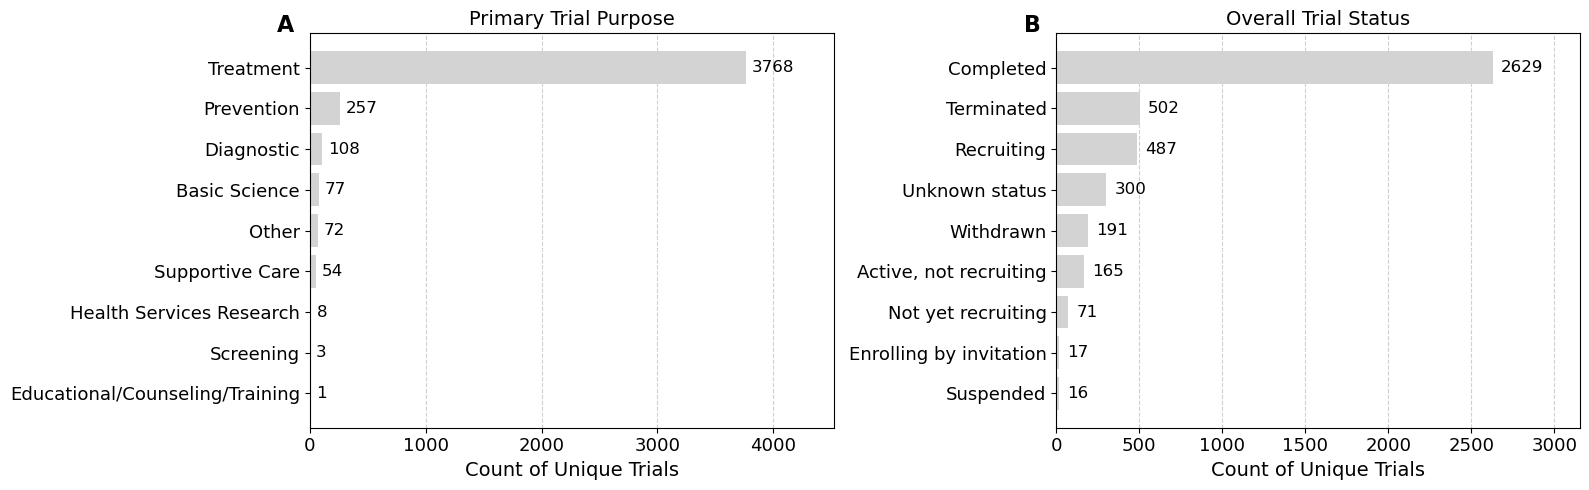

In [29]:
aact_viz.viz_purpose_status(general_metadata_p2, f"{viz_path}/trials_purpose_and_status{suffix}.pdf")

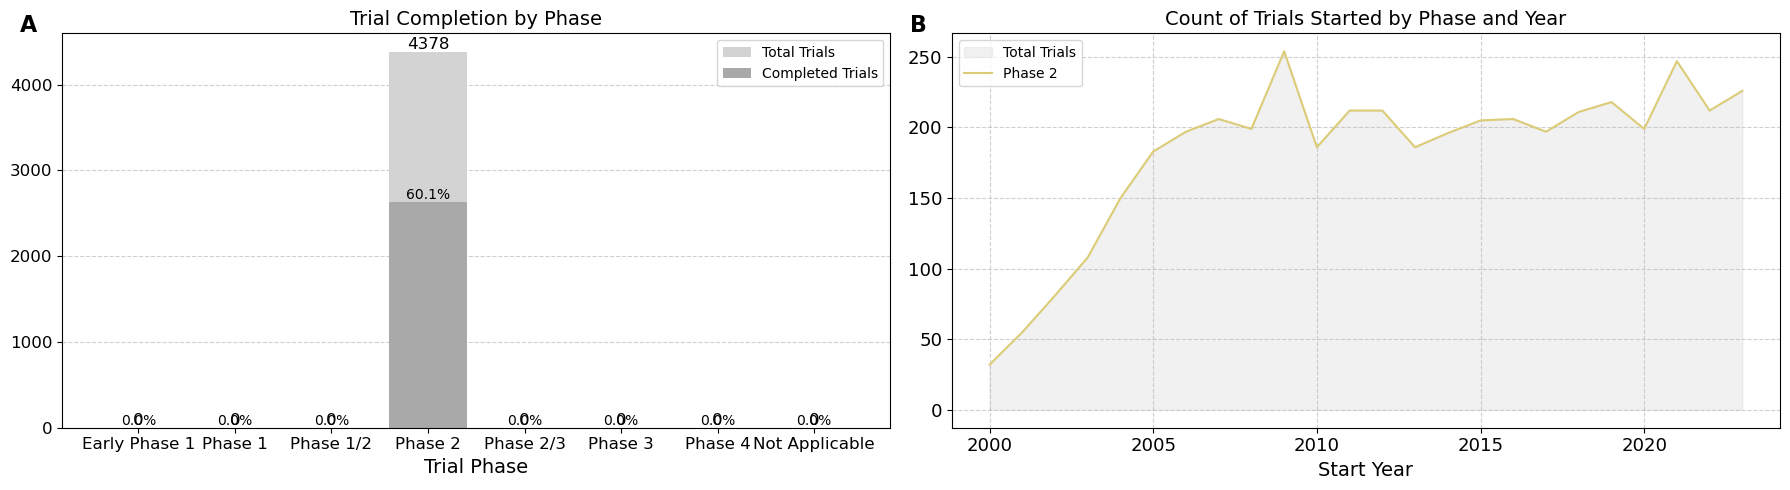

In [31]:
aact_viz.viz_phase_year_growth(general_metadata_p2, f"{viz_path}/trials_phase_and_over_time{suffix}.pdf")

/Users/sdoneva/Documents/Work/In Progress/PhD/PhD Projects/In Progress/NeuroTrialAnalysis/src/aact_viz.py:141: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/Users/sdoneva/Documents/Work/In Progress/PhD/PhD Projects/In Progress/NeuroTrialAnalysis/src/aact_viz.py:148: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


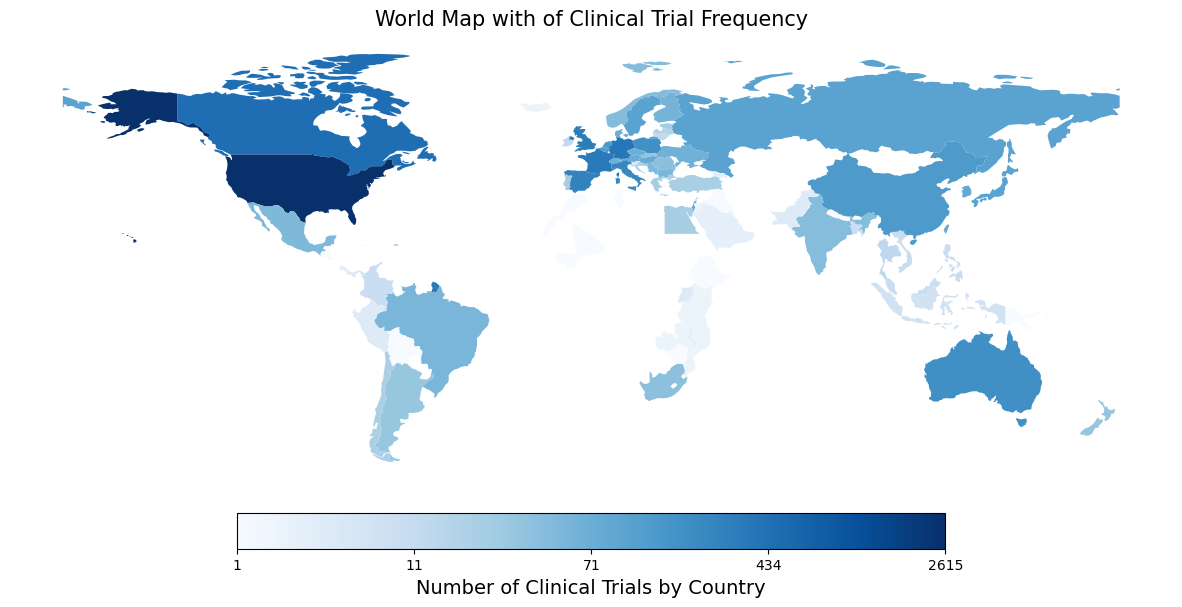

In [33]:
aact_viz.viz_countries_world_map(trial_design_metadata_p2, f"{viz_path}/trials_world_map{suffix}.pdf")

/Users/sdoneva/Documents/Work/In Progress/PhD/PhD Projects/In Progress/NeuroTrialAnalysis/src/aact_viz.py:239: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_yticklabels(['{:.0f}%'.format(x * 100) for x in axs[1].get_yticks()])


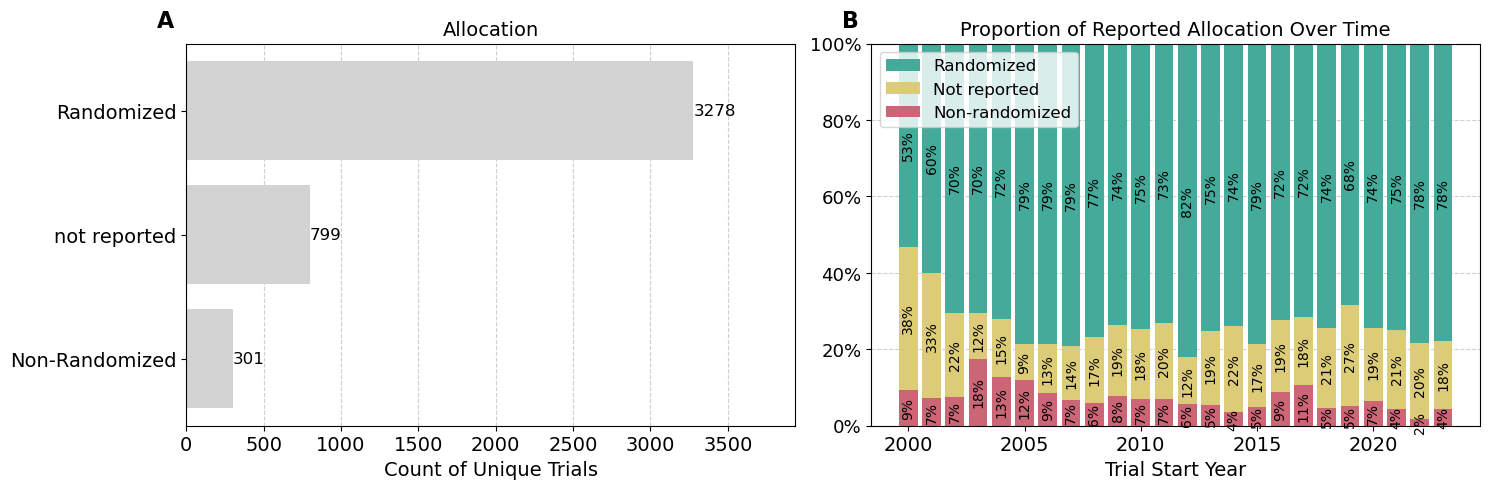

In [35]:
aact_viz.viz_allocation(trial_design_metadata_p2, f"{viz_path}/design_allocation_over_time{suffix}.pdf")

/Users/sdoneva/Documents/Work/In Progress/PhD/PhD Projects/In Progress/NeuroTrialAnalysis/src/aact_viz.py:321: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_yticklabels(['{:.0f}%'.format(x * 100) for x in axs[1].get_yticks()])


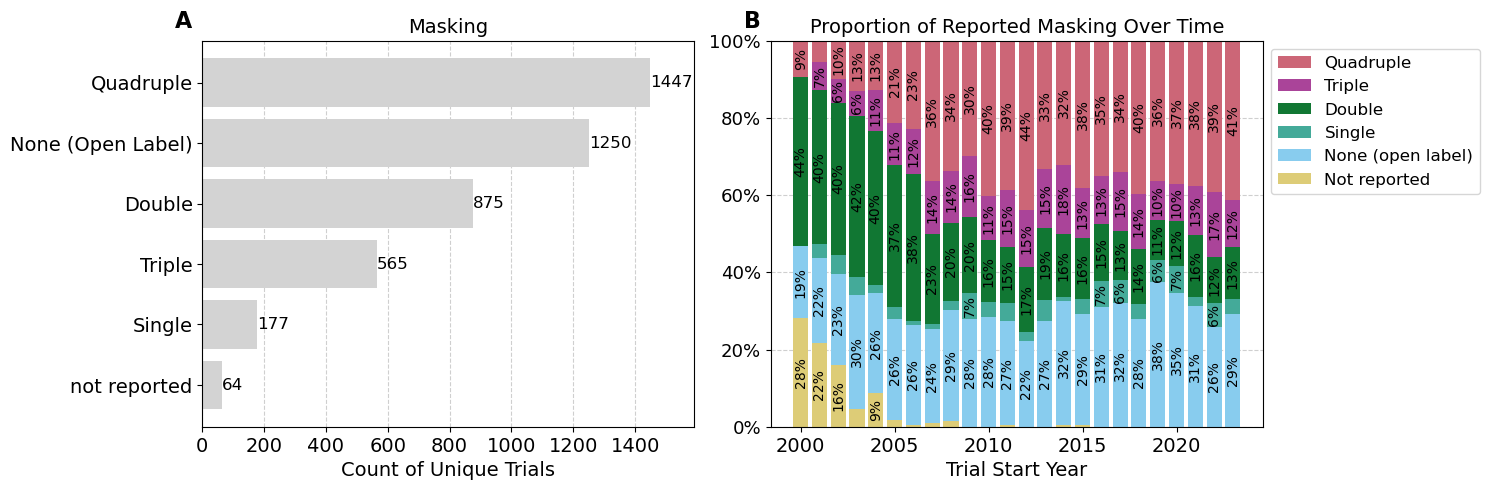

In [37]:
aact_viz.viz_masking(trial_design_metadata_p2, f"{viz_path}/design_masking_over_time{suffix}.pdf")

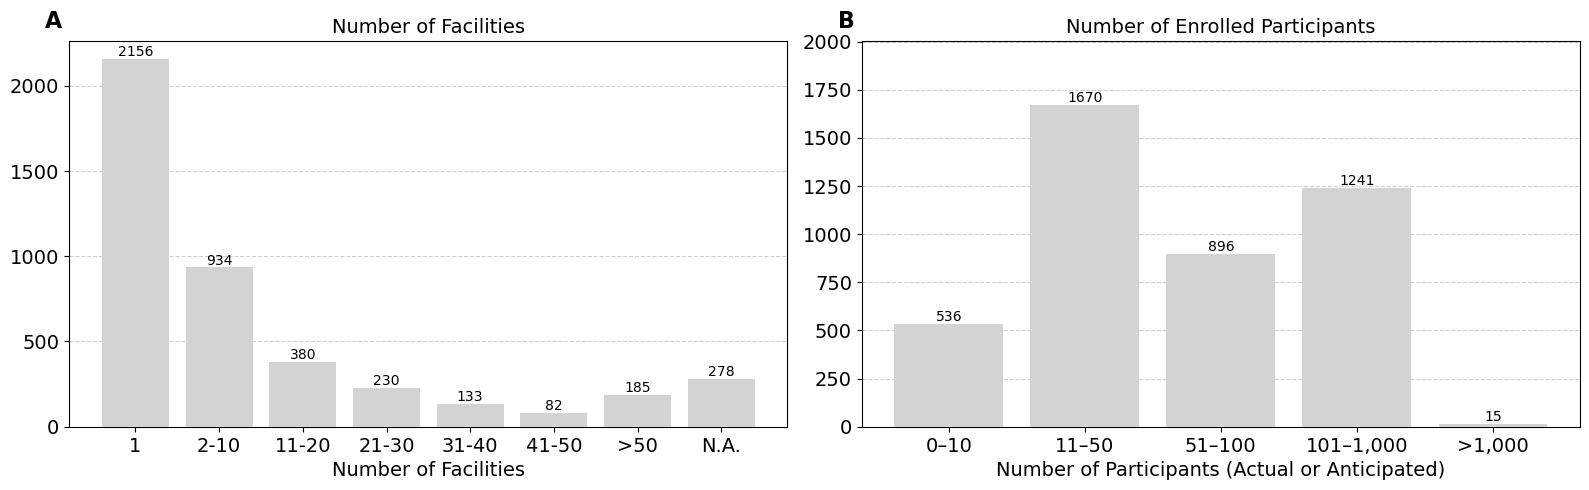

In [43]:
aact_viz.viz_facilities_enrollment(trial_design_metadata_p2, trial_enrollment_metadata_p2, f"{viz_path}/design_trial_size_facilities_enrollment{suffix}.pdf")


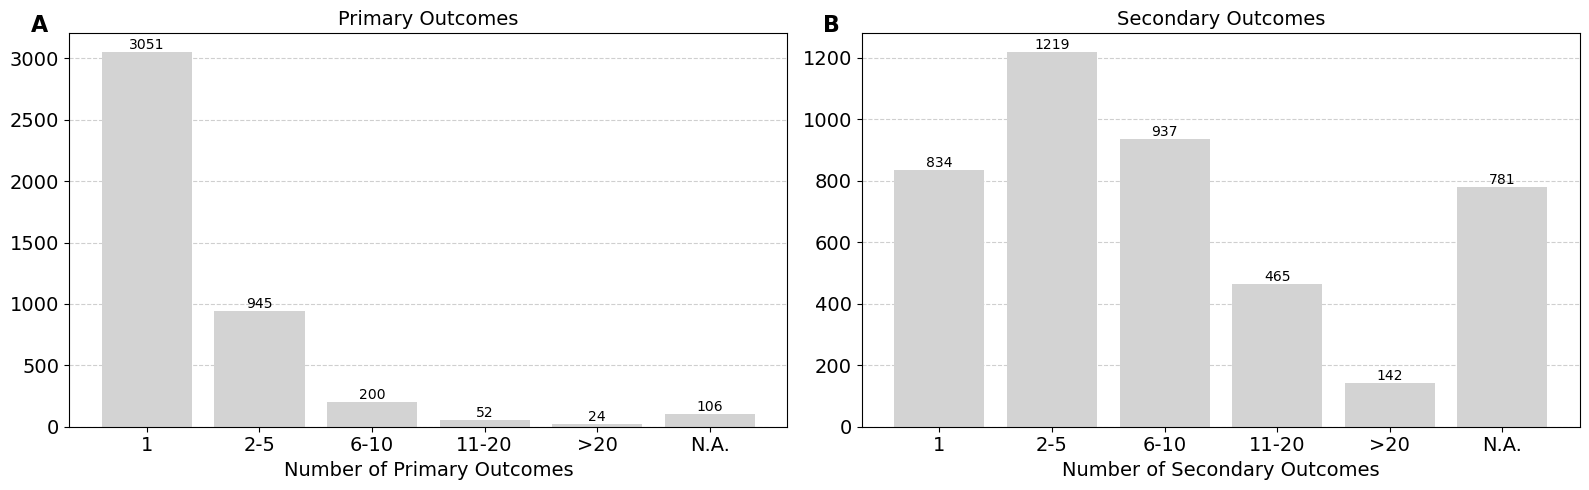

In [45]:
aact_viz.viz_outcomes(trial_design_metadata_p2, f"{viz_path}/design_outcomes_primary_secondary_number_frequency{suffix}.pdf")

/Users/sdoneva/Documents/Work/In Progress/PhD/PhD Projects/In Progress/NeuroTrialAnalysis/src/aact_viz.py:495: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(['{:.0f}%'.format(x * 100) for x in ax1.get_yticks()])


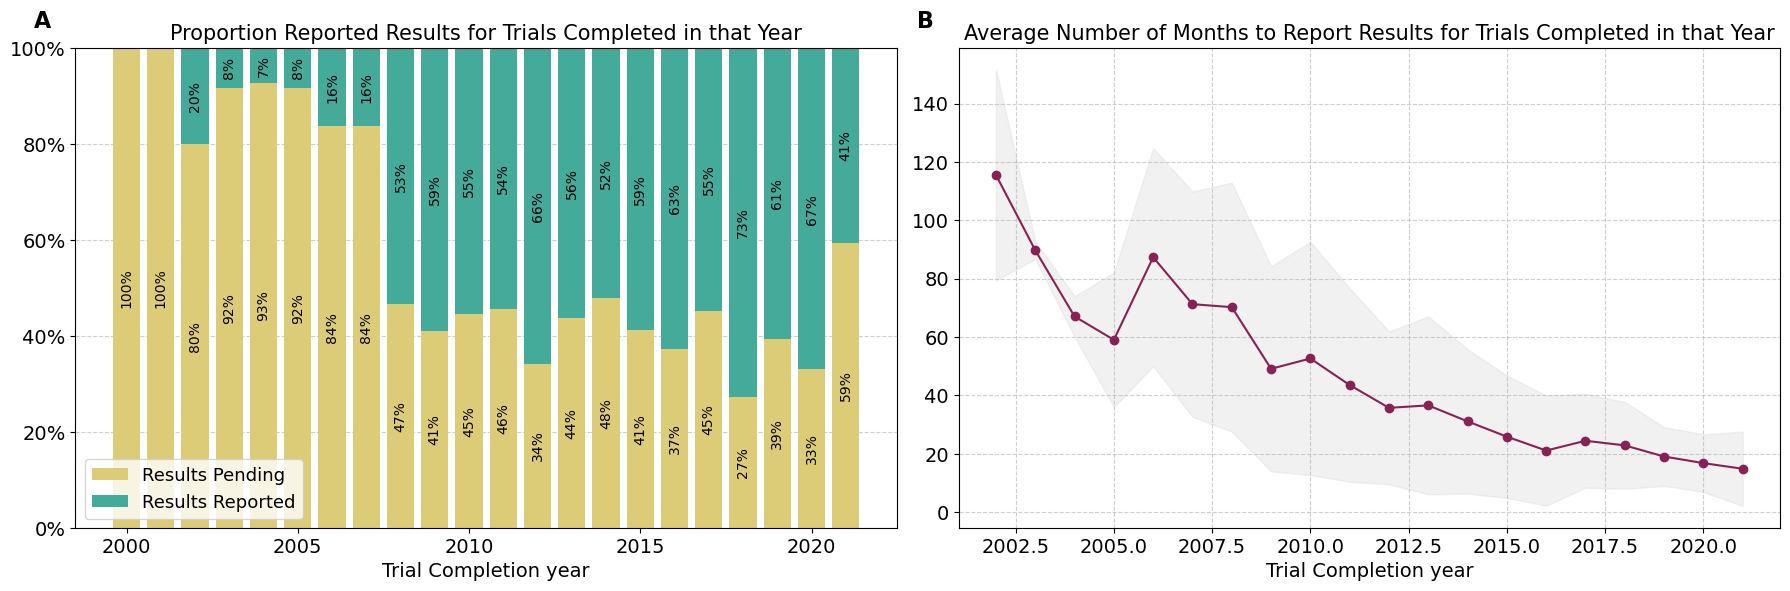

In [47]:
aact_viz.viz_results_reporting(trial_results_reporting_metadata_p2, f"{viz_path}/completed_trials_results_reporting{suffix}.pdf")

/Users/sdoneva/Documents/Work/In Progress/PhD/PhD Projects/In Progress/NeuroTrialAnalysis/src/aact_viz.py:518: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['start_year'] = df_filtered['start_year'].astype(int)


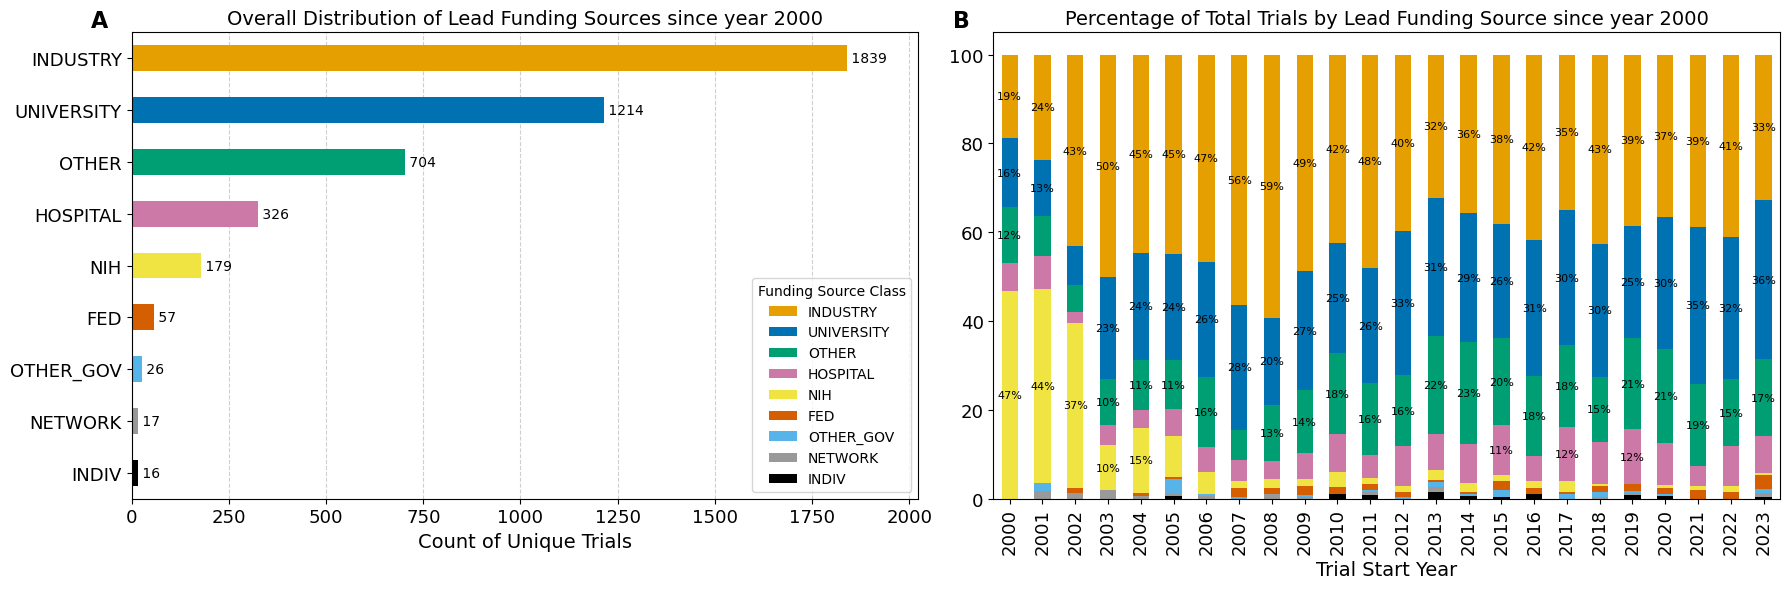

In [49]:
aact_viz.viz_sponsorship_lead(trial_sponsorship_metadata_p2,  f"{viz_path}/lead_funding_agency{suffix}.pdf")

# Phase 3

In [52]:
suffix = '_phase3'
viz_path = 'viz/phase3_trials'

general_metadata = pd.read_csv(f"{data_out_path}general_metadata{suffix}.csv")
trial_design_metadata = pd.read_csv(f"{data_out_path}trial_design_metadata{suffix}.csv")
trial_enrollment_metadata = pd.read_csv(f"{data_out_path}trial_enrollment_metadata{suffix}.csv")
trial_results_reporting_metadata = pd.read_csv(f"{data_out_path}trial_results_reporting_metadata{suffix}.csv")
trial_sponsorship_metadata = pd.read_csv(f"{data_out_path}trial_sponsorship_metadata{suffix}.csv")

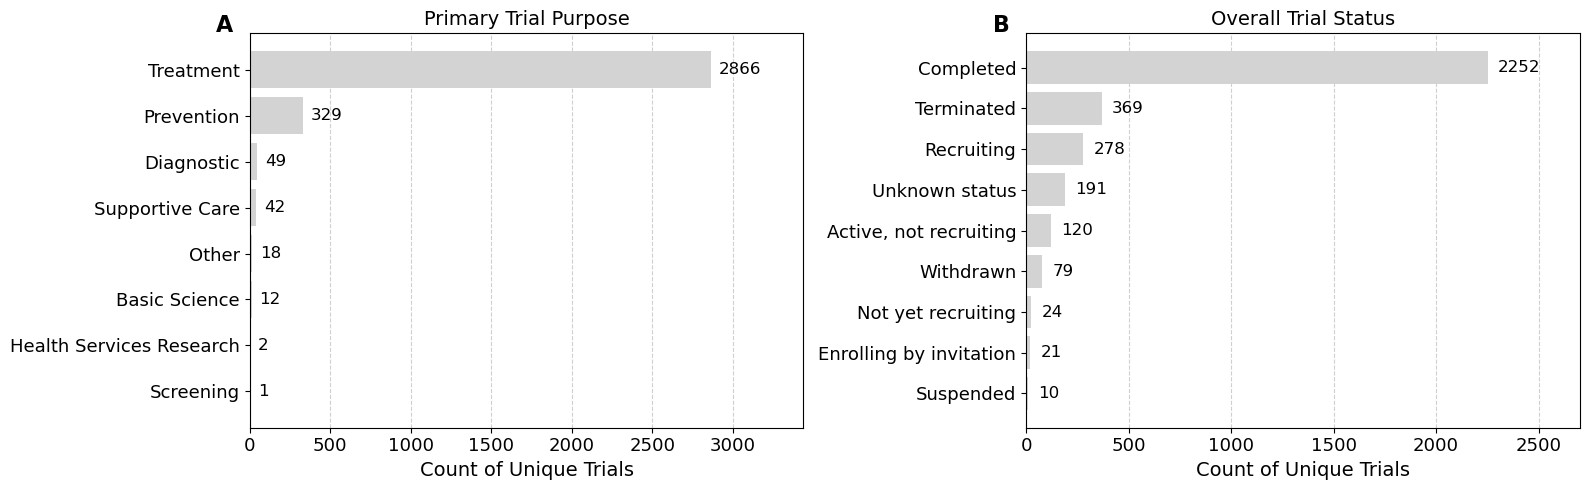

In [54]:
aact_viz.viz_purpose_status(general_metadata, f"{viz_path}/trials_purpose_and_status{suffix}.pdf")

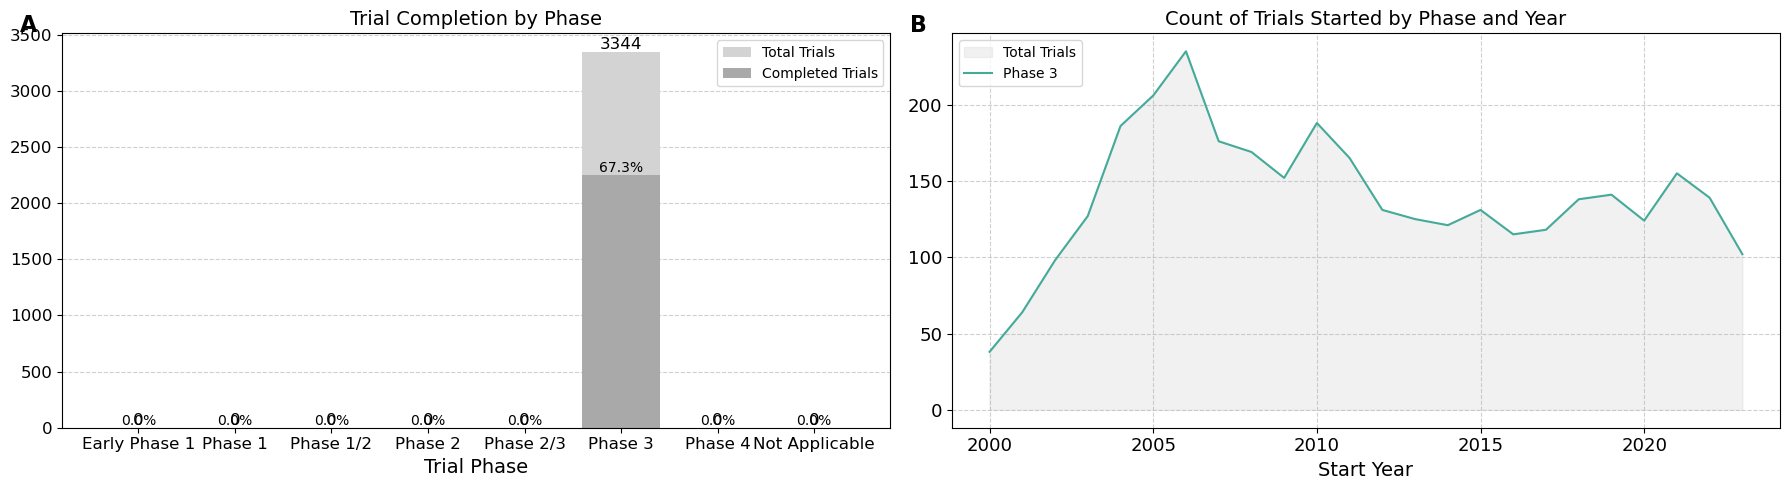

In [56]:
aact_viz.viz_phase_year_growth(general_metadata, f"{viz_path}/trials_phase_and_over_time{suffix}.pdf")

/Users/sdoneva/Documents/Work/In Progress/PhD/PhD Projects/In Progress/NeuroTrialAnalysis/src/aact_viz.py:141: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/Users/sdoneva/Documents/Work/In Progress/PhD/PhD Projects/In Progress/NeuroTrialAnalysis/src/aact_viz.py:148: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


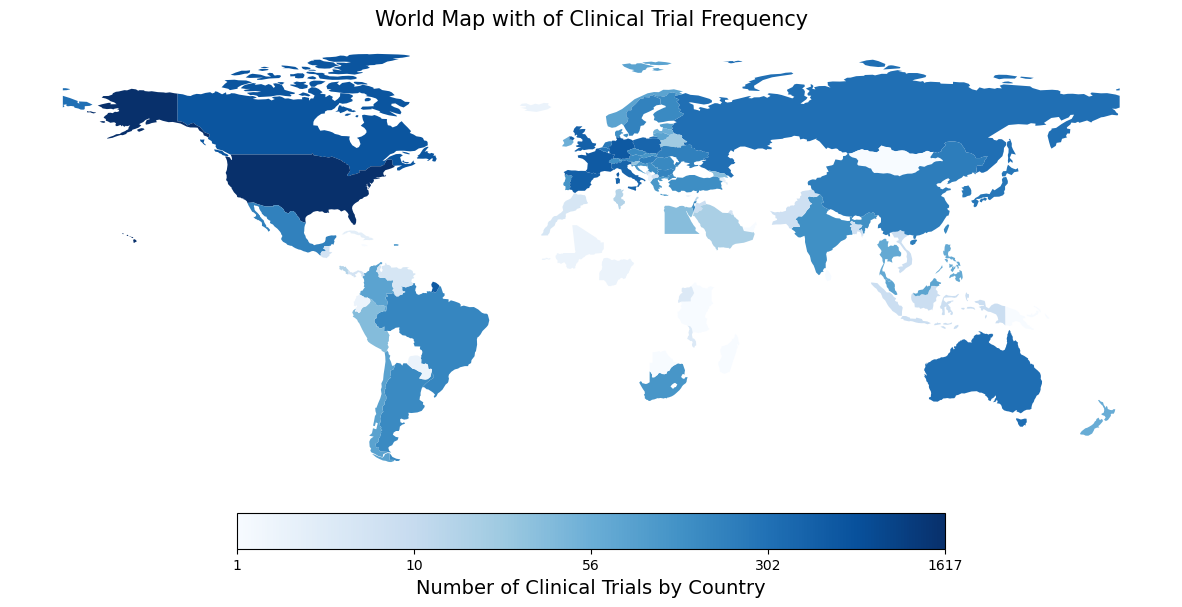

In [58]:
aact_viz.viz_countries_world_map(trial_design_metadata, f"{viz_path}/trials_world_map{suffix}.pdf")

/Users/sdoneva/Documents/Work/In Progress/PhD/PhD Projects/In Progress/NeuroTrialAnalysis/src/aact_viz.py:239: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_yticklabels(['{:.0f}%'.format(x * 100) for x in axs[1].get_yticks()])


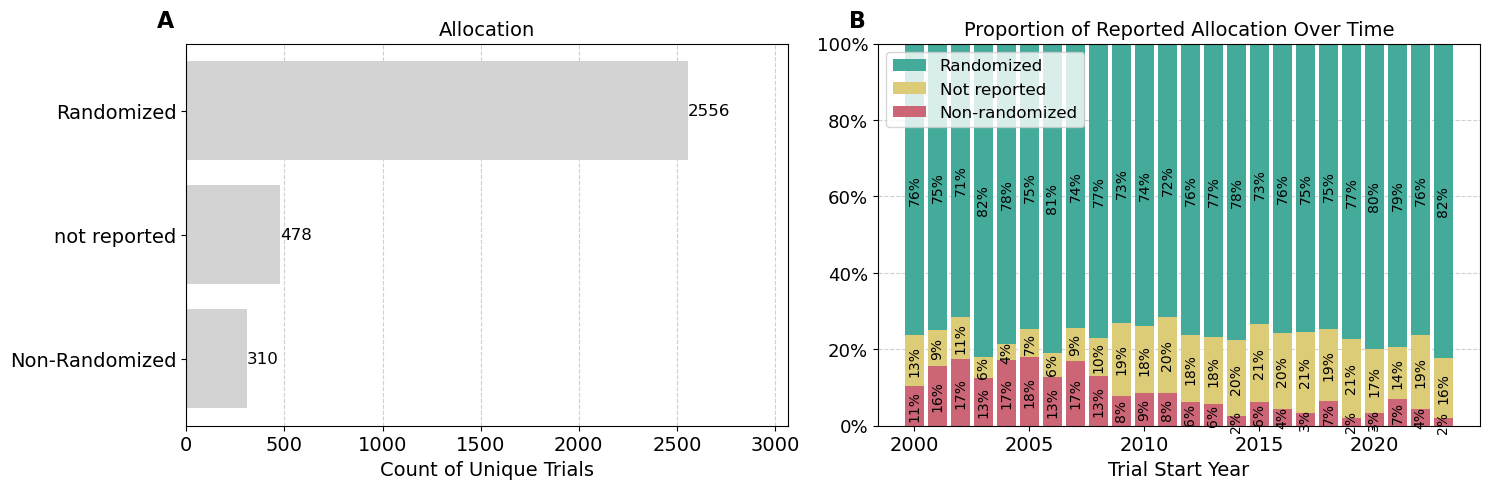

In [60]:
aact_viz.viz_allocation(trial_design_metadata, f"{viz_path}/design_allocation_over_time{suffix}.pdf")

/Users/sdoneva/Documents/Work/In Progress/PhD/PhD Projects/In Progress/NeuroTrialAnalysis/src/aact_viz.py:321: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_yticklabels(['{:.0f}%'.format(x * 100) for x in axs[1].get_yticks()])


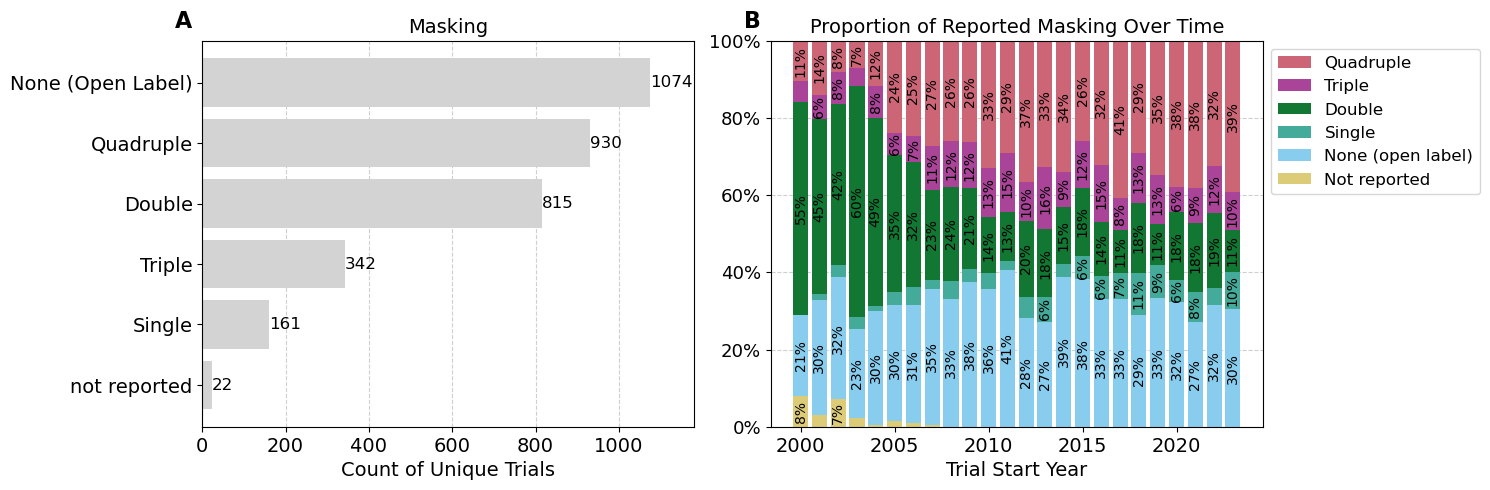

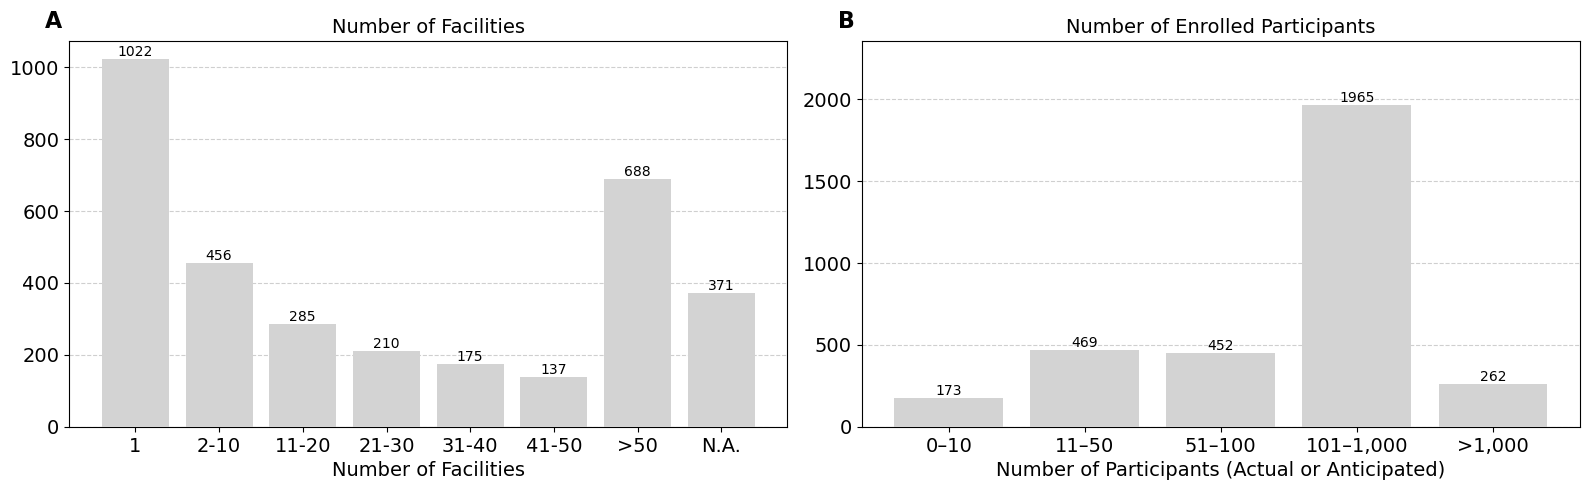

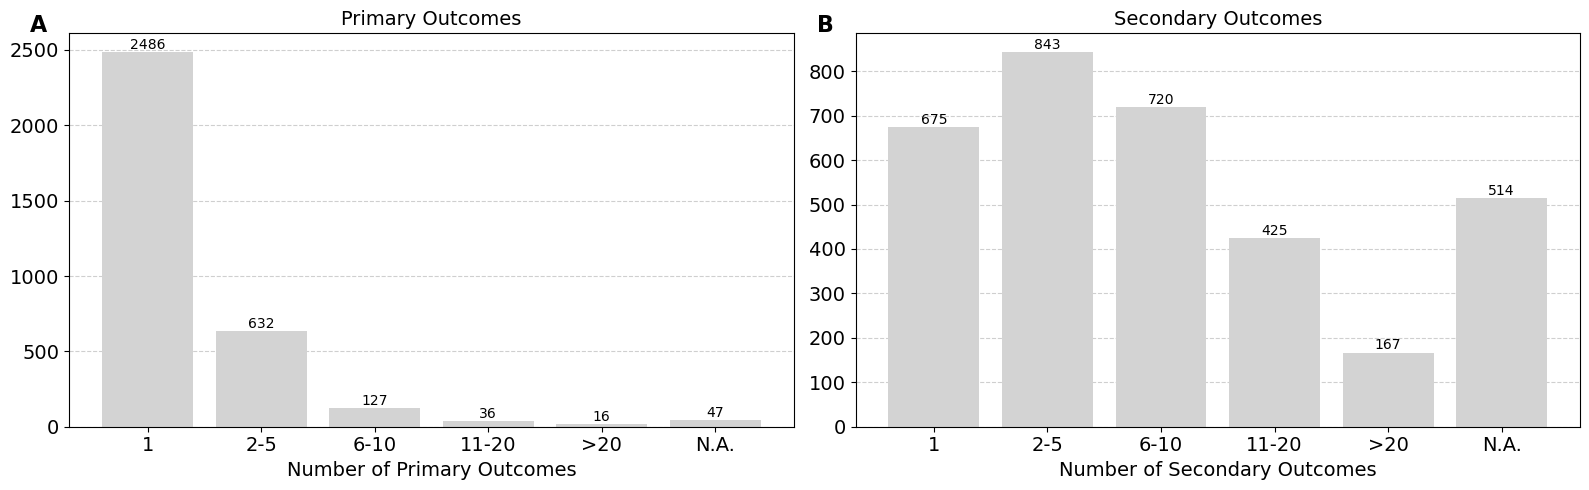

In [62]:
aact_viz.viz_masking(trial_design_metadata, f"{viz_path}/design_masking_over_time{suffix}.pdf")
aact_viz.viz_facilities_enrollment(trial_design_metadata, trial_enrollment_metadata, f"{viz_path}/design_trial_size_facilities_enrollment{suffix}.pdf")
aact_viz.viz_outcomes(trial_design_metadata, f"{viz_path}/design_outcomes_primary_secondary_number_frequency{suffix}.pdf")

/Users/sdoneva/Documents/Work/In Progress/PhD/PhD Projects/In Progress/NeuroTrialAnalysis/src/aact_viz.py:495: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(['{:.0f}%'.format(x * 100) for x in ax1.get_yticks()])
/Users/sdoneva/Documents/Work/In Progress/PhD/PhD Projects/In Progress/NeuroTrialAnalysis/src/aact_viz.py:518: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['start_year'] = df_filtered['start_year'].astype(int)


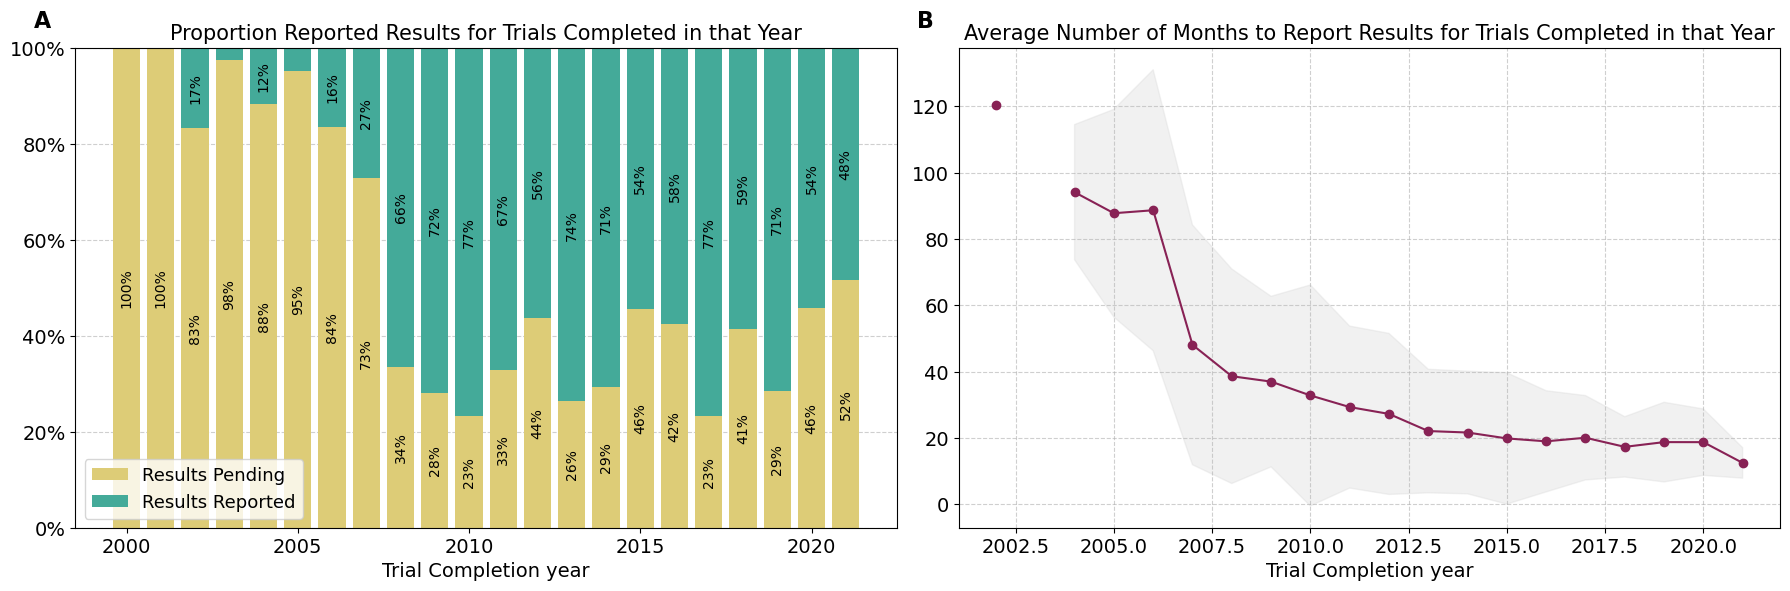

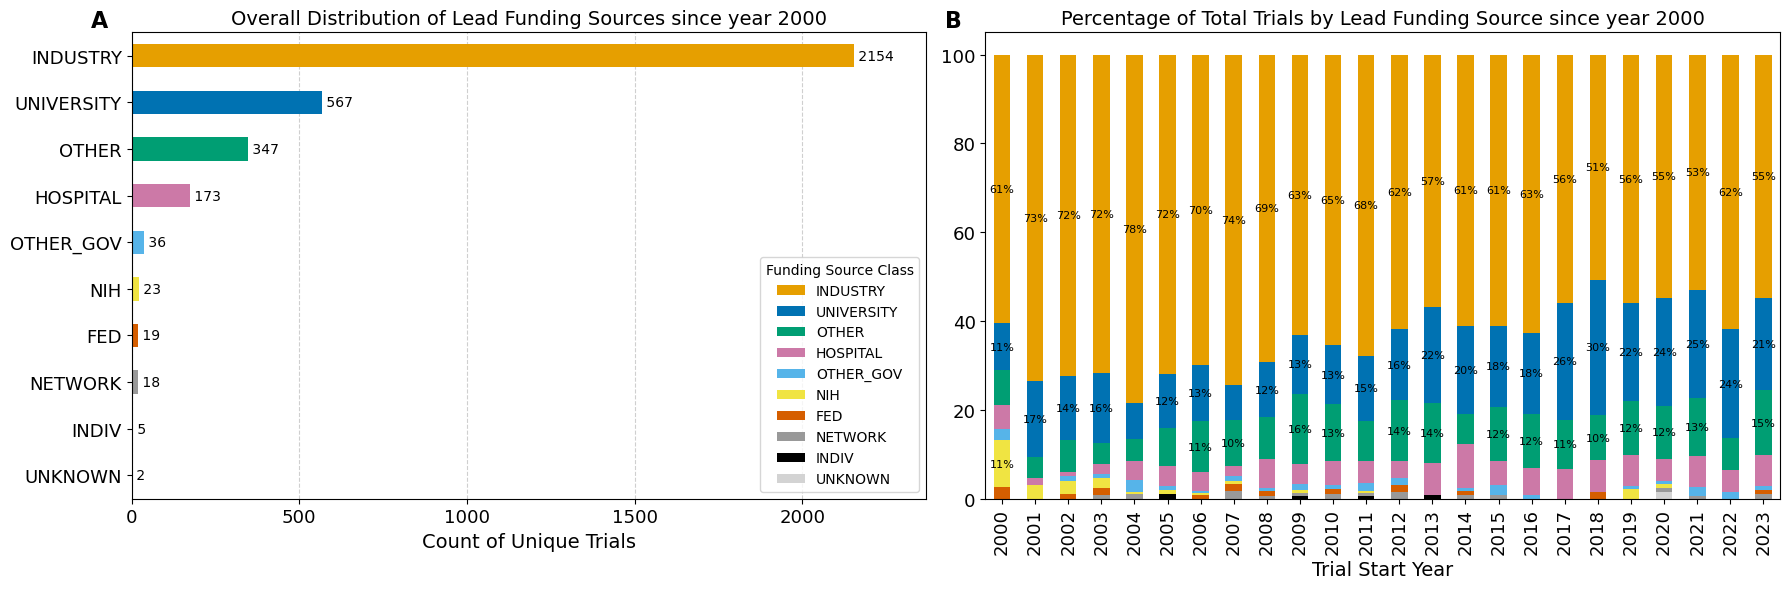

In [64]:
aact_viz.viz_results_reporting(trial_results_reporting_metadata, f"{viz_path}/completed_trials_results_reporting{suffix}.pdf")
aact_viz.viz_sponsorship_lead(trial_sponsorship_metadata,  f"{viz_path}/lead_funding_agency{suffix}.pdf")

In [66]:
trial_design_metadata_p2_3 = pd.concat([trial_design_metadata_p2, trial_design_metadata], ignore_index=True)

In [68]:
trial_design_metadata_p2_3.shape

(19994, 12)

In [70]:
general_metadata_p2_3 = pd.concat([general_metadata_p2, general_metadata], ignore_index=True)

In [72]:
general_metadata_p2_3.shape

(7722, 6)

In [74]:
trial_design_metadata_p2_3 = trial_design_metadata_p2_3.merge(general_metadata_p2_3[['nct_id','phase']], how='left', on='nct_id')

In [76]:
trial_design_metadata_p2_3.shape

(19994, 13)

In [78]:
import matplotlib.pyplot as plt
import pandas as pd

def viz_allocation_by_phase(trial_design, output_file):
    """
    Creates a single grouped (horizontal) bar chart that shows, for each phase,
    the percentage of trials (nct_id) in each allocation category.
    
    - Uses custom colors for Phase 2 vs. Phase 3.
    - The x-axis represents percentages (0% - 100%).
    - The bars are sorted from largest to smallest.
    - Grid lines are added for readability.
    """

    # Drop duplicates to ensure each (nct_id, allocation, phase) is only counted once
    df = trial_design[['nct_id', 'allocation', 'phase']].drop_duplicates()

    # Group by allocation and phase, counting unique nct_ids
    grouped = df.groupby(['allocation', 'phase'], dropna=False)['nct_id'].nunique().reset_index()

    # Pivot so that each allocation is a row, and each phase is a column
    pivot_df = grouped.pivot(index='allocation', columns='phase', values='nct_id').fillna(0)

    # Calculate total trials per phase (column sums)
    col_sums = pivot_df.sum(axis=0)

    # Convert counts to percentages
    pivot_df_perc = pivot_df.div(col_sums, axis='columns') * 100

    # Sort categories by total percentage across all phases (largest to smallest)
    pivot_df_perc['Total'] = pivot_df_perc.sum(axis=1)
    pivot_df_perc = pivot_df_perc.sort_values(by='Total', ascending=True)
    pivot_df_perc.drop(columns='Total', inplace=True)  # Remove total before plotting

    # Define custom colors for different phases
    phase_colors = {
        'Phase 2': '#1f77b4',  # Blue
        'Phase 3': '#ff7f0e',  # Orange
    }

    # Ensure only existing phases are used in colors
    colors = [phase_colors[col] if col in phase_colors else 'gray' for col in pivot_df_perc.columns]

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot grouped horizontal bar chart with custom colors
    pivot_df_perc.plot(kind='barh', ax=ax, color=colors, zorder=3)

    # Add bar labels with percentage format
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', fmt='%.1f%%', fontsize=13)

    # Set x-axis limit to 100% (since we are showing percentages)
    ax.set_xlim(0, 100)

    # Add grid lines with dashed style for better readability
    ax.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)

    # Set labels and title
    ax.set_xlabel('Percentage of Trials Within Each Phase', fontsize=14)
    ax.set_ylabel('', fontsize=12)
    ax.set_title('Allocation by Phase (as % of Each Phase)', fontsize=14)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=13)
    # Move legend outside the plot
    ax.legend(title='Phase', fontsize=10, bbox_to_anchor=(1.0, 0.15))

    # Improve layout and save
    plt.tight_layout()
    plt.savefig(output_file)
    #plt.close()

In [232]:
import matplotlib.pyplot as plt
import pandas as pd

def viz_allocation_and_masking_by_phase(trial_design, output_file):
    """
    Creates two grouped (horizontal) bar charts:
    1. Allocation Distribution by Phase (as % of each phase)
    2. Masking Distribution by Phase (as % of each phase)
    
    - Uses custom colors for Phase 2 vs. Phase 3.
    - The x-axis represents percentages (0% - 100%).
    - The bars are sorted from largest to smallest in each plot.
    - Grid lines are added for readability.
    """

    def create_plot(df, category_col, ax, title, label='A'):
        """
        Helper function to generate a single grouped bar plot based on the given category column.
        """
        # Drop duplicates to ensure each (nct_id, category, phase) is counted only once
        df = df[['nct_id', category_col, 'phase']].drop_duplicates()

        # Group by category and phase, counting unique nct_ids
        grouped = df.groupby([category_col, 'phase'], dropna=False)['nct_id'].nunique().reset_index()

        # Pivot so that each category is a row, and each phase is a column
        pivot_df = grouped.pivot(index=category_col, columns='phase', values='nct_id').fillna(0)

        # Calculate total trials per phase (column sums)
        col_sums = pivot_df.sum(axis=0)

        # Convert counts to percentages
        pivot_df_perc = pivot_df.div(col_sums, axis='columns') * 100

        # Sort categories by total percentage across all phases (largest to smallest)
        pivot_df_perc['Total'] = pivot_df_perc.sum(axis=1)
        pivot_df_perc = pivot_df_perc.sort_values(by='Total', ascending=True)
        pivot_df_perc.drop(columns='Total', inplace=True)  # Remove total before plotting

        # Define custom colors for different phases
        phase_colors = {
            'Phase 2': '#0072B2',  # Blue
            'Phase 3': '#E69F00',  # Orange
        } # '#0072B2', '#E69F00'

        # Ensure only existing phases are used in colors
        colors = [phase_colors[col] if col in phase_colors else 'gray' for col in pivot_df_perc.columns]

        # Plot grouped horizontal bar chart with custom colors
        pivot_df_perc.plot(kind='barh', ax=ax, color=colors, zorder=3)

        # Add bar labels with percentage format
        for container in ax.containers:
            ax.bar_label(container, label_type='edge', fmt='%.0f%%', fontsize=13)

        # Set x-axis limit to 100% (since we are showing percentages)
        ax.set_xlim(0, 100)

        # Add grid lines with dashed style for better readability
        ax.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)

        # Set labels and title
        ax.set_xlabel('Percentage of Trials Within Each Phase', fontsize=13)
        ax.set_ylabel('', fontsize=12)
        ax.set_title(title, fontsize=14)
        ax.tick_params(axis='x', labelsize=14)
        ax.tick_params(axis='y', labelsize=14)
        ax.text(-0.03, 1.05, label, transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

        # Move legend outside the plot
        ax.legend(title='Phase', fontsize=13, bbox_to_anchor=(1.0, 0.19))

    # Create figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

    # Plot Allocation Distribution
    create_plot(trial_design, 'allocation', axes[0], 'Allocation by Phase (as % of Each Phase)', label='A')

    # Plot Masking Distribution
    create_plot(trial_design, 'masking', axes[1], 'Masking by Phase (as % of Each Phase)', label='B')

    # Improve layout and save
    plt.tight_layout()
    plt.savefig(output_file)
    plt.show()

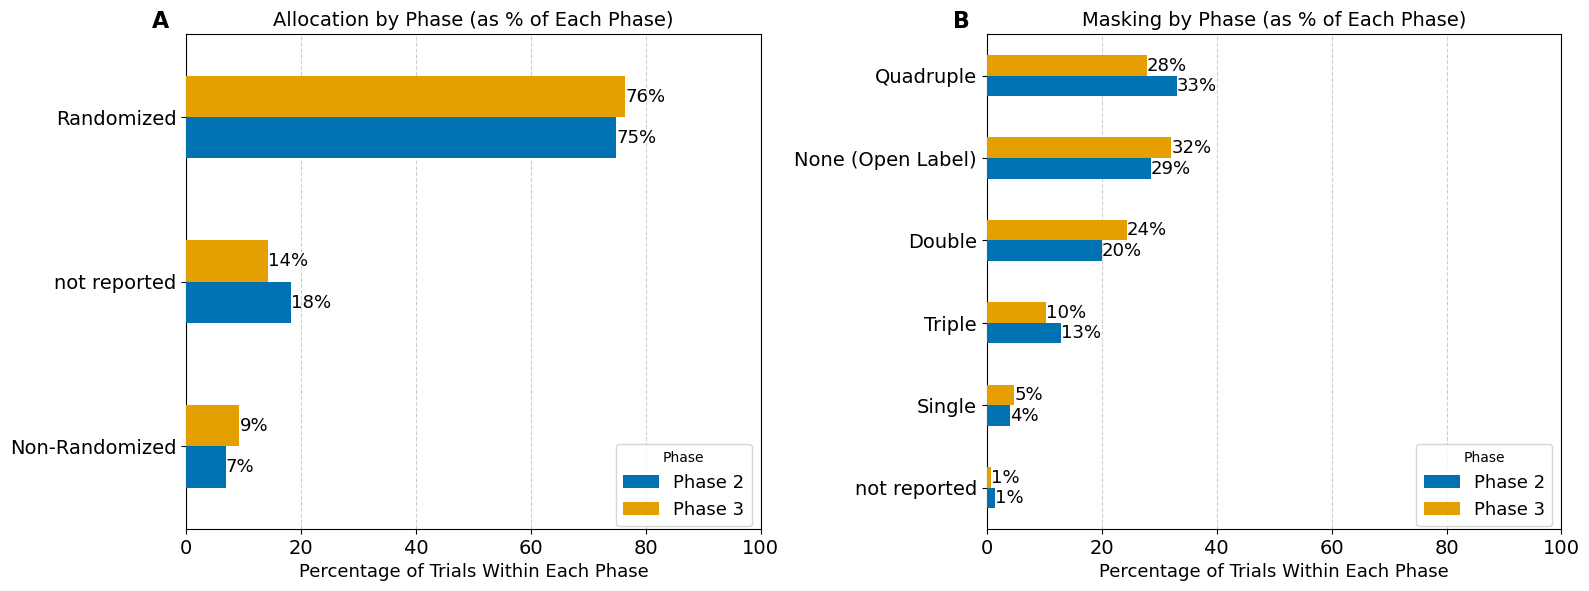

In [234]:
viz_allocation_and_masking_by_phase(trial_design_metadata_p2_3, "viz/phase_2_vs_3/allocation_masking_by_phase.pdf")

In [190]:
import matplotlib.pyplot as plt
import pandas as pd

def viz_agency_class_by_phase(trial_design, output_file):
    """
    Creates a grouped (horizontal) bar chart to visualize the distribution of
    agency classes across different trial phases.

    - Uses custom colors for Phase 2 vs. Phase 3.
    - The x-axis represents percentages (0% - 100%).
    - The bars are sorted from largest to smallest.
    - Grid lines are added for readability.
    """

    # Drop duplicates to ensure each (nct_id, agency_class, phase) is counted only once
    df = trial_design[['nct_id', 'agency_class', 'phase']].drop_duplicates()

    # Group by agency_class and phase, counting unique nct_ids
    grouped = df.groupby(['agency_class', 'phase'], dropna=False)['nct_id'].nunique().reset_index()

    # Pivot so that each agency_class is a row, and each phase is a column
    pivot_df = grouped.pivot(index='agency_class', columns='phase', values='nct_id').fillna(0)

    # Calculate total trials per phase (column sums)
    col_sums = pivot_df.sum(axis=0)

    # Convert counts to percentages
    pivot_df_perc = pivot_df.div(col_sums, axis='columns') * 100

    # Sort agency classes by total percentage across all phases (largest to smallest)
    pivot_df_perc['Total'] = pivot_df_perc.sum(axis=1)
    pivot_df_perc = pivot_df_perc.sort_values(by='Total', ascending=True)
    pivot_df_perc.drop(columns='Total', inplace=True)  # Remove total before plotting

    # Define custom colors for different phases
    phase_colors = {
        'Phase 2': '#E69F00',  # Blue
        'Phase 3': '#0072B2',  # Orange
    }

    # Ensure only existing phases are used in colors
    colors = [phase_colors[col] if col in phase_colors else 'gray' for col in pivot_df_perc.columns]

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot grouped horizontal bar chart with custom colors
    pivot_df_perc.plot(kind='barh', ax=ax, color=colors, zorder=3)

    # Add bar labels with percentage format
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', fmt='%.0f%%', fontsize=13)

    # Set x-axis limit to 100% (since we are showing percentages)
    ax.set_xlim(0, 100)

    # Add grid lines with dashed style for better readability
    ax.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)

    # Set labels and title
    ax.set_xlabel('Percentage of Trials Within Each Phase', fontsize=13)
    ax.set_ylabel('', fontsize=12)
    ax.set_title('Agency Class by Phase (as % of Each Phase)', fontsize=14)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

    # Move legend outside the plot
    ax.legend(title='Phase', fontsize=13, bbox_to_anchor=(1.0, 0.19))

    # Improve layout and save
    plt.tight_layout()
    plt.savefig(output_file)
    plt.show()


In [176]:
trial_sponsorship_metadata_p2_3 = pd.concat([trial_sponsorship_metadata_p2, trial_sponsorship_metadata], ignore_index=True)

In [178]:
tomap_classes = {"AMBIG", "NETWORK", "INDIV"}

# Apply mapping: If in `tomap_classes`, map to "REMAINING"; otherwise, keep original
trial_sponsorship_metadata_p2_3["agency_class"] = trial_sponsorship_metadata_p2_3["agency_class"].apply(lambda x: "REMAINING" if x in tomap_classes else x)


In [180]:
trial_sponsorship_metadata_p2_3

,nct_id,start_year,agency_class,lead_or_collaborator,sponsor_name,phase
0,NCT00000307,2003.0,NIH,lead,National Institute on Drug Abuse (NIDA),Phase 2
1,NCT00000307,2003.0,UNIVERSITY,collaborator,University of Texas,Phase 2
2,NCT00000333,2001.0,NIH,lead,National Institute on Drug Abuse (NIDA),Phase 2
3,NCT00000333,2001.0,HOSPITAL,collaborator,Washington D.C. Veterans Affairs Medical Center,Phase 2
4,NCT00000439,2000.0,NIH,lead,National Institute on Alcohol Abuse and Alcoho...,Phase 2
...,...,...,...,...,...,...
12358,NCT06153004,2023.0,OTHER,collaborator,Sangath,Phase 3
12359,NCT06189027,2018.0,UNIVERSITY,lead,University of Southern California,Phase 3
12360,NCT06189027,2018.0,OTHER,collaborator,Multidisciplinary Association for Psychedelic ...,Phase 3
12361,NCT06211478,2023.0,UNIVERSITY,lead,Ain Shams University,Phase 3


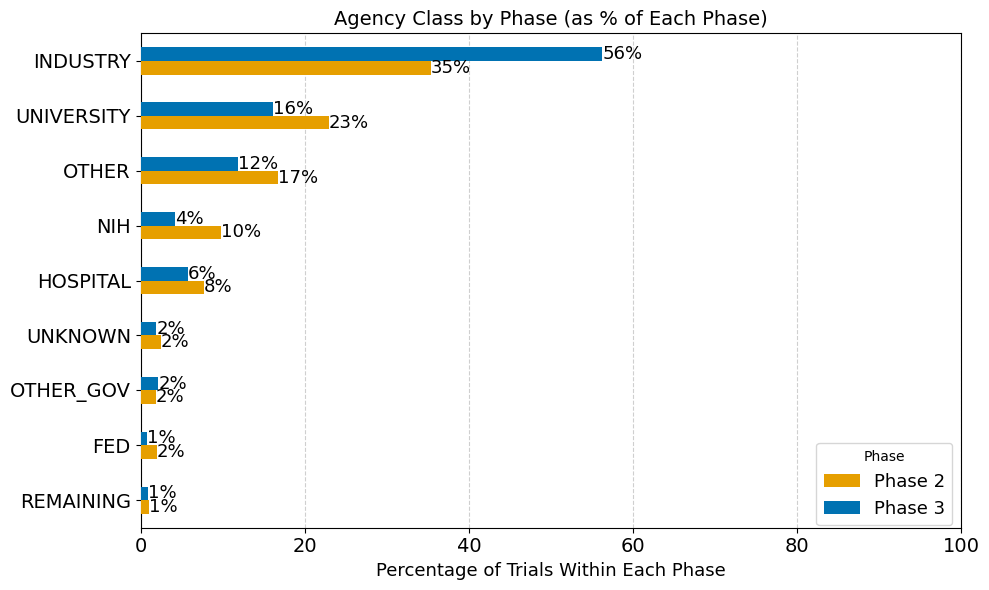

In [192]:
viz_agency_class_by_phase(trial_sponsorship_metadata_p2_3, "viz/phase_2_vs_3/trial_sponsorship_by_phase.pdf")

In [94]:
trial_enrollment_metadata

,nct_id,start_year,enrollment,enrollment_type,enrollment_class
0,NCT00006349,2001.0,9.0,Actual,0–10
1,NCT00007189,2001.0,2625.0,NaN,">1,000"
2,NCT00009230,2000.0,NaN,NaN,not reported
3,NCT00010803,2000.0,3069.0,Actual,">1,000"
4,NCT00018564,2000.0,NaN,NaN,not reported
...,...,...,...,...,...
3339,NCT06141486,2023.0,858.0,Anticipated,"101–1,000"
3340,NCT06153004,2023.0,60.0,Anticipated,51–100
3341,NCT06189027,2018.0,45.0,Actual,11–50
3342,NCT06211478,2023.0,40.0,Actual,11–50


In [154]:
trial_enrollment_metadata.start_year.max()

2023.0

In [194]:
def viz_university_vs_industry_funding(trial_design, output_file):
    """
    Plots the number of Phase 2 and Phase 3 trials funded by Universities and Industry over time.
    
    - Filters only "UNIVERSITY" and "INDUSTRY" agency classes.
    - Groups data by start_year, phase, and agency_class.
    - Plots separate line charts for Phase 2 and Phase 3.
    """

    # Filter only relevant agency classes
    funding_df = trial_design[trial_design['agency_class'].isin(['UNIVERSITY', 'INDUSTRY'])].copy()

    # Drop duplicates to count unique trials per (year, phase, agency_class)
    funding_df = funding_df[['nct_id', 'start_year', 'agency_class', 'phase']].drop_duplicates()

    # Group by start_year, phase, and agency_class to count trials
    grouped = funding_df.groupby(['start_year', 'phase', 'agency_class'], dropna=False)['nct_id'].nunique().reset_index()

    # Pivot data to format it for line plotting
    pivot_df = grouped.pivot(index='start_year', columns=['phase', 'agency_class'], values='nct_id').fillna(0)

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Define colors
    phase_colors = {
        ('Phase 2', 'UNIVERSITY'): '#E69F00',  # Blue
        ('Phase 2', 'INDUSTRY'): '#E69F00',  # Orange
        ('Phase 3', 'UNIVERSITY'): '#0072B2',  # Green
        ('Phase 3', 'INDUSTRY'): '#0072B2',  # Red
    }

    # Plot each line
    for (phase, agency), color in phase_colors.items():
        if (phase, agency) in pivot_df:
            if agency == 'UNIVERSITY':
                marker = ''   
                linestyle = '--'
            else:
                marker = ''
                linestyle='-'
            ax.plot(
                pivot_df.index, pivot_df[(phase, agency)],
                marker=marker, linestyle=linestyle, label=f"{agency} - {phase}",
                color=color
            )

    # Labels and title
    ax.set_xlabel("Year", fontsize=14)
    ax.set_ylabel("Number of Trials", fontsize=14)
    ax.set_title("University vs. Industry Funding Over Time (Phase 2 & 3)", fontsize=14)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    
    # Grid for readability
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    # Legend
    ax.legend(title="Funding Source & Phase", fontsize=11)

    # Improve layout and save
    plt.tight_layout()
    plt.savefig(output_file)
    plt.show()


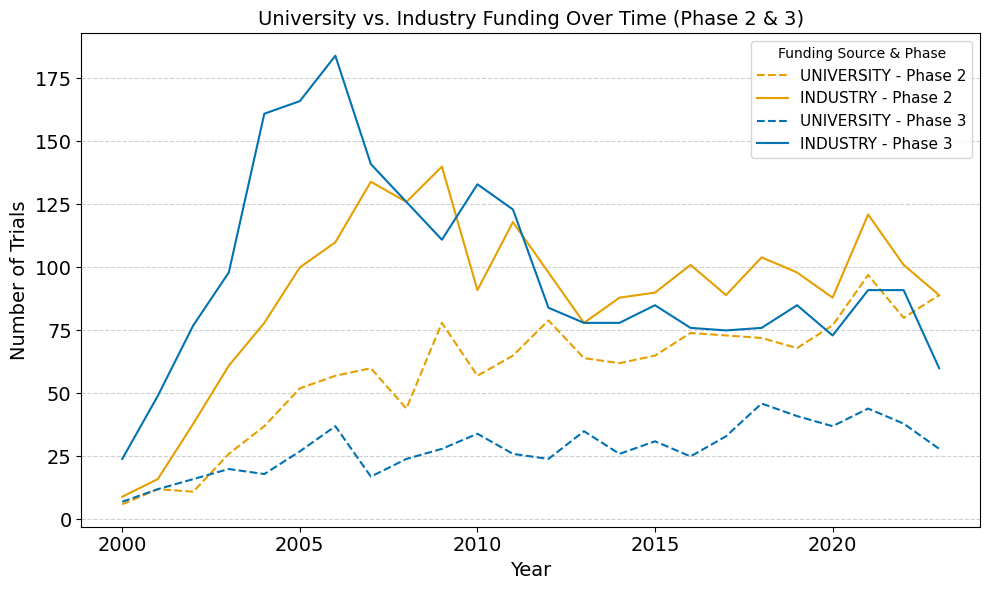

In [196]:
viz_university_vs_industry_funding(trial_sponsorship_metadata_p2_3, "viz/phase_2_vs_3/university_vs_industry_funding_time.pdf")

In [132]:
import matplotlib.pyplot as plt
import pandas as pd

def viz_university_vs_industry_funding_dual(trial_design, output_file):
    """
    Plots the number of Phase 2 and Phase 3 trials funded by Universities and Industry over time.
    
    - Filters only "UNIVERSITY" and "INDUSTRY" agency classes.
    - Groups data by start_year, phase, and agency_class.
    - Creates two subplots: one for Phase 2, one for Phase 3.
    """

    # Filter only relevant agency classes
    funding_df = trial_design[trial_design['agency_class'].isin(['UNIVERSITY', 'INDUSTRY'])].copy()

    # Drop duplicates to count unique trials per (year, phase, agency_class)
    funding_df = funding_df[['nct_id', 'start_year', 'agency_class', 'phase']].drop_duplicates()

    # Group by start_year, phase, and agency_class to count trials
    grouped = funding_df.groupby(['start_year', 'phase', 'agency_class'], dropna=False)['nct_id'].nunique().reset_index()

    # Pivot data for easier plotting
    pivot_df = grouped.pivot(index='start_year', columns=['phase', 'agency_class'], values='nct_id').fillna(0)

    # Create the figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

    # Define colors and styles
    phase_colors = {
        'UNIVERSITY': 'darkorange',  # University
        'INDUSTRY': 'royalblue',  # Industry
    }
    markers = {'UNIVERSITY': 's', 'INDUSTRY': 'o'}
    linestyles = {'UNIVERSITY': '--', 'INDUSTRY': '-'}

    # Plot for Phase 2
    ax = axes[0]
    for agency in ['UNIVERSITY', 'INDUSTRY']:
        if ('Phase 2', agency) in pivot_df:
            ax.plot(
                pivot_df.index, pivot_df[('Phase 2', agency)],
                marker=markers[agency], linestyle=linestyles[agency], label=agency,
                color=phase_colors[agency]
            )
    ax.set_title("Phase 2: University vs. Industry Funding", fontsize=14)
    ax.set_xlabel("Year", fontsize=13)
    ax.set_ylabel("Number of Trials", fontsize=13)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.legend(fontsize=11)

    # Plot for Phase 3
    ax = axes[1]
    for agency in ['UNIVERSITY', 'INDUSTRY']:
        if ('Phase 3', agency) in pivot_df:
            ax.plot(
                pivot_df.index, pivot_df[('Phase 3', agency)],
                marker=markers[agency], linestyle=linestyles[agency], label=agency,
                color=phase_colors[agency]
            )
    ax.set_title("Phase 3: University vs. Industry Funding", fontsize=14)
    ax.set_xlabel("Year", fontsize=13)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.legend(fontsize=11)

    # Improve layout and save
    plt.tight_layout()
    plt.savefig(output_file)
    plt.show()


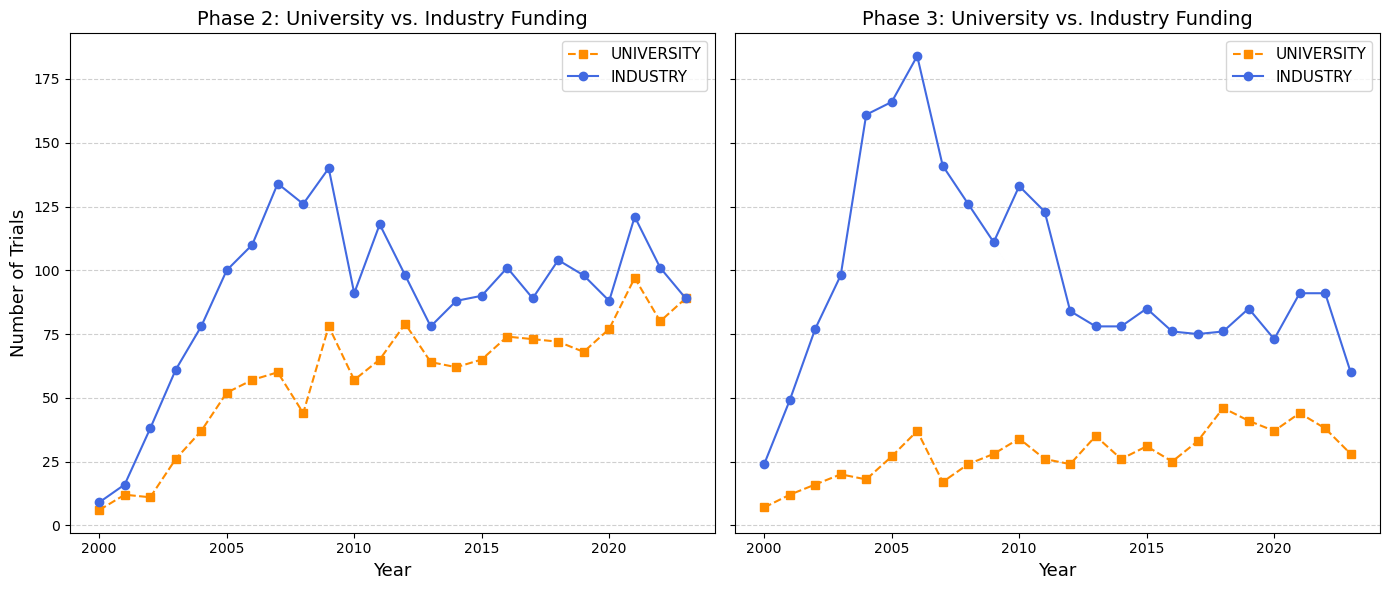

In [134]:
viz_university_vs_industry_funding_dual(trial_sponsorship_metadata_p2_3, "viz/phase_2_vs_3/university_vs_industry_funding_time_dual.pdf")

In [242]:
import matplotlib.pyplot as plt
import pandas as pd

def viz_funding_plot_combined(trial_design, output_file):
    """
    Creates a single figure with two subplots:
    1. Left: Grouped horizontal bar chart for agency class by phase.
    2. Right: Line chart for university vs. industry funding over time.
    """

    # === AGENCY CLASS BY PHASE (BAR CHART) ===
    df = trial_design[['nct_id', 'agency_class', 'phase']].drop_duplicates()
    grouped = df.groupby(['agency_class', 'phase'], dropna=False)['nct_id'].nunique().reset_index()
    pivot_df = grouped.pivot(index='agency_class', columns='phase', values='nct_id').fillna(0)
    col_sums = pivot_df.sum(axis=0)
    pivot_df_perc = pivot_df.div(col_sums, axis='columns') * 100
    pivot_df_perc['Total'] = pivot_df_perc.sum(axis=1)
    pivot_df_perc = pivot_df_perc.sort_values(by='Total', ascending=True)
    pivot_df_perc.drop(columns='Total', inplace=True)

    phase_colors = {'Phase 2': '#E69F00', 'Phase 3': '#0072B2'}
    colors = [phase_colors[col] if col in phase_colors else 'gray' for col in pivot_df_perc.columns]

    # === UNIVERSITY VS. INDUSTRY FUNDING OVER TIME (LINE CHART) ===
    funding_df = trial_design[trial_design['agency_class'].isin(['UNIVERSITY', 'INDUSTRY'])].copy()
    funding_df = funding_df[['nct_id', 'start_year', 'agency_class', 'phase']].drop_duplicates()
    grouped_funding = funding_df.groupby(['start_year', 'phase', 'agency_class'], dropna=False)['nct_id'].nunique().reset_index()
    pivot_funding_df = grouped_funding.pivot(index='start_year', columns=['phase', 'agency_class'], values='nct_id').fillna(0)

    funding_colors = {'UNIVERSITY': '#E69F00', 'INDUSTRY': '#0072B2'}
    markers = {'UNIVERSITY': '', 'INDUSTRY': ''}
    linestyles = {'UNIVERSITY': '--', 'INDUSTRY': '-'}

    # === CREATE FIGURE WITH TWO SUBPLOTS ===
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1, 1]})

    # === PLOT 1: AGENCY CLASS BY PHASE (LEFT) ===
    pivot_df_perc.plot(kind='barh', ax=axes[0], color=colors, zorder=3)
    for container in axes[0].containers:
        axes[0].bar_label(container, label_type='edge', fmt='%.0f%%', fontsize=13)
    axes[0].set_xlim(0, 100)
    axes[0].grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
    axes[0].set_xlabel('Percentage of Trials Within Each Phase', fontsize=14)
    axes[0].set_ylabel('', fontsize=12)
    axes[0].set_title('Agency Class by Phase (as % of Each Phase)', fontsize=14)
    axes[0].tick_params(axis='x', labelsize=13)
    axes[0].tick_params(axis='y', labelsize=13)
    axes[0].legend(title='Phase', fontsize=13, bbox_to_anchor=(1.0, 0.19))
    axes[0].text(-0.03, 1.05, 'A', transform=axes[0].transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
    # === PLOT 2: UNIVERSITY VS. INDUSTRY FUNDING OVER TIME (RIGHT) ===
    for agency in ['UNIVERSITY', 'INDUSTRY']:
        for phase in ['Phase 2', 'Phase 3']:
            if (phase, agency) in pivot_funding_df:
                axes[1].plot(
                    pivot_funding_df.index, pivot_funding_df[(phase, agency)],
                    marker=markers[agency], linestyle=linestyles[agency], label=f"{agency} - {phase}",
                    color=phase_colors[phase]
                )
    axes[1].set_xlabel("Year", fontsize=14)
    axes[1].set_ylabel("Number of Trials", fontsize=13)
    axes[1].set_title("University vs. Industry Funding Over Time", fontsize=14)
    axes[1].grid(axis='y', linestyle='--', alpha=0.6)
    axes[1].legend(title="Funding Source & Phase", fontsize=13)
    axes[1].tick_params(axis='x', labelsize=13)
    axes[1].tick_params(axis='y', labelsize=13)
    axes[1].text(-0.03, 1.05, 'B', transform=axes[1].transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

    # === FINAL ADJUSTMENTS ===
    plt.tight_layout()
    plt.savefig(output_file)
    plt.show()


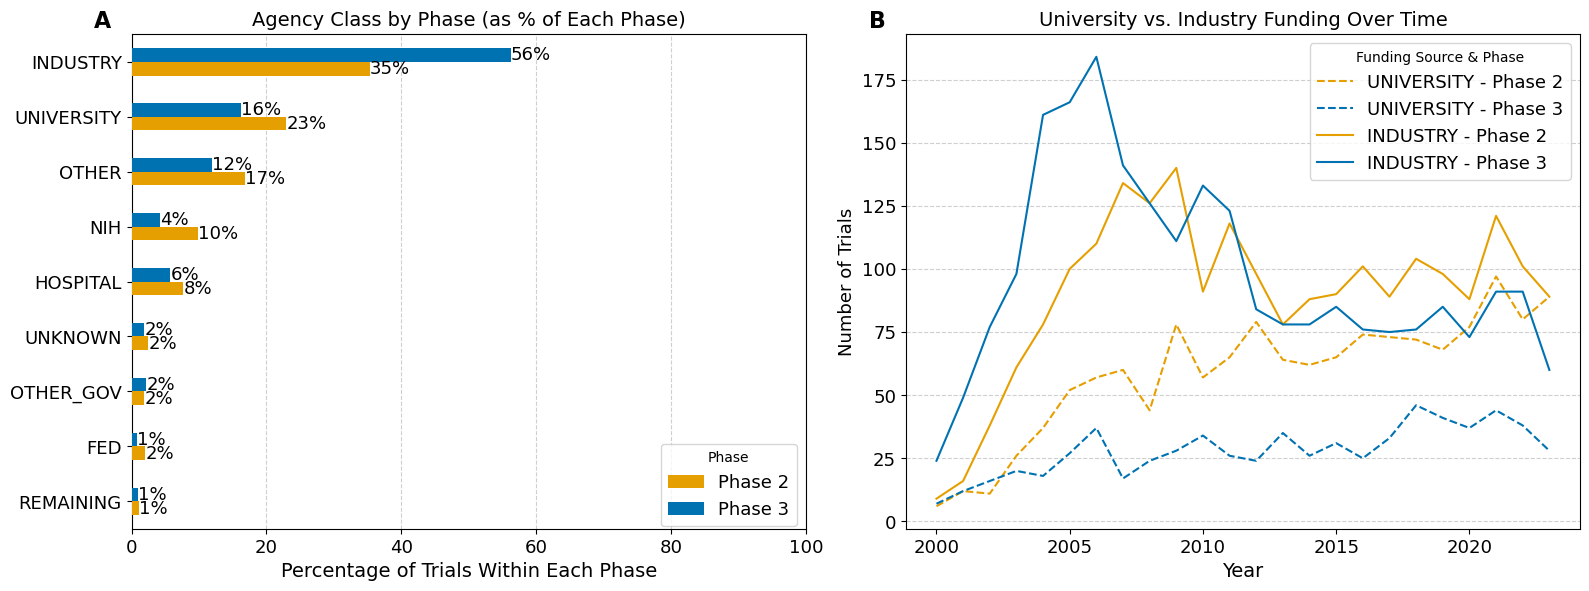

In [244]:
viz_funding_plot_combined(trial_sponsorship_metadata_p2_3, "viz/phase_2_vs_3/university_vs_industry_combined.pdf")

In [252]:
trial_results_reporting_metadata_p2

,nct_id,start_year,completion_year,were_results_reported,months_to_report_results,overall_status
0,NCT00000307,2003.0,2007.0,False,NaN,Completed
1,NCT00000333,2001.0,2003.0,False,NaN,Completed
2,NCT00000439,2000.0,2003.0,False,NaN,Completed
3,NCT00001956,2000.0,2005.0,False,NaN,Completed
4,NCT00004268,2001.0,NaN,False,NaN,Completed
...,...,...,...,...,...,...
4373,NCT06235775,2023.0,2025.0,False,NaN,Recruiting
4374,NCT06254482,2023.0,2027.0,False,NaN,Recruiting
4375,NCT06255977,2022.0,2024.0,False,NaN,Recruiting
4376,NCT06259526,2023.0,2025.0,False,NaN,Recruiting


In [256]:
trial_results_reporting_metadata_p2_3 = pd.concat([trial_results_reporting_metadata_p2, trial_results_reporting_metadata], ignore_index=True)

In [258]:
trial_results_reporting_metadata_p2_3 = trial_results_reporting_metadata_p2_3.merge(general_metadata_p2_3[['nct_id','phase']], how='left', on='nct_id')

In [373]:
trial_results_reporting_metadata_p2_3

,nct_id,start_year,completion_year,were_results_reported,months_to_report_results,overall_status,phase
0,NCT00000307,2003.0,2007.0,False,NaN,Completed,Phase 2
1,NCT00000333,2001.0,2003.0,False,NaN,Completed,Phase 2
2,NCT00000439,2000.0,2003.0,False,NaN,Completed,Phase 2
3,NCT00001956,2000.0,2005.0,False,NaN,Completed,Phase 2
4,NCT00004268,2001.0,NaN,False,NaN,Completed,Phase 2
...,...,...,...,...,...,...,...
7717,NCT06141486,2023.0,2028.0,False,NaN,Recruiting,Phase 3
7718,NCT06153004,2023.0,2024.0,False,NaN,Recruiting,Phase 3
7719,NCT06189027,2018.0,2024.0,False,NaN,"Active, not recruiting",Phase 3
7720,NCT06211478,2023.0,2023.0,False,NaN,Completed,Phase 3


In [454]:

def viz_reported_results_by_phase(trial_design, output_file):
    """
    Plots the percentage of trials that reported results for each phase.
    
    - Groups data by phase.
    - Calculates the percentage of trials with reported results (were_results_reported = True).
    - Creates a bar chart showing the reporting percentage by phase.
    """

    # Drop duplicates to ensure each (nct_id, phase) is only counted once
    df = trial_design[['nct_id', 'phase', 'were_results_reported', 'completion_year', 'overall_status']].drop_duplicates()
    df = df[(df['completion_year'] < 2022) & (df['overall_status'] == 'Completed')]

    # Group by phase and count total trials
    phase_counts = df.groupby('phase')['nct_id'].count()

    # Count trials that reported results
    reported_counts = df[df['were_results_reported'] == True].groupby('phase')['nct_id'].count()

    # Calculate reporting percentages
    reporting_percentage = (reported_counts / phase_counts) * 100

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(8, 5))

    # Define colors for bars
    phase_colors = {'Phase 2': '#E69F00', 'Phase 3': '#0072B2'}

    # Plot the bar chart
    reporting_percentage.plot(kind='bar', ax=ax, color=[phase_colors.get(phase, 'gray') for phase in reporting_percentage.index])

    # Add bar labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', fontsize=12, label_type='edge')

    # Set labels and title
    ax.set_ylabel('', fontsize=13)
    ax.set_xlabel('Phase', fontsize=13)
    ax.set_title('Percentage of Reported Results by Phase', fontsize=14)

    # Grid for readability
    #ax.grid(axis='y', linestyle='--', alpha=0.6)

    # Improve layout and save
    plt.tight_layout()
    plt.savefig(output_file)
    plt.show()


In [510]:
df = trial_results_reporting_metadata_p2_3.copy()

In [668]:
df[(df['overall_status'] == 'Completed') & (df['completion_year'] == 2000)]

,nct_id,start_year,completion_year,were_results_reported,overall_status,phase
5,NCT00004576,2000,2000,False,Completed,Phase 2
4863,NCT00249223,2000,2000,False,Completed,Phase 3


In [522]:
def viz_reported_results_over_time(trial_design, output_file):
    """
    Plots the percentage of trials that reported results over time (start_year) by phase.
    
    - Groups data by start_year and phase.
    - Calculates the percentage of trials with reported results (were_results_reported = True).
    - Creates a bar chart where Phase 2 and Phase 3 are separate bars, and non-reported percentage is shown in light gray.
    """
    # Drop duplicates to ensure each (nct_id, start_year, phase) is only counted once
    df = trial_design[['nct_id', 'start_year', 'completion_year', 'were_results_reported', 'overall_status', 'phase']].drop_duplicates()
    
    # Convert start_year and completion_year to integers
    df = df.dropna(subset=['start_year', 'completion_year'])
    df['start_year'] = df['start_year'].astype(int)
    df['completion_year'] = df['completion_year'].astype(int)
    
    # Filter trials where completion_year < 2022 and overall_status is 'Completed'
    df = df[(df['completion_year'] < 2022) & (df['overall_status'] == 'Completed')]
    
    # Group by start_year and phase, counting total trials
    total_counts = df.groupby(['completion_year', 'phase'])['nct_id'].count().unstack()
    
    # Count trials that reported results
    reported_counts = df[df['were_results_reported'] == True].groupby(['completion_year', 'phase'])['nct_id'].count().unstack()
    
    # Calculate reporting percentages
    reporting_percentage = (reported_counts / total_counts) * 100
    
    # Calculate non-reported percentages
    non_reporting_percentage = 100 - reporting_percentage.fillna(0)
    
    # Calculate overall total reporting percentage per phase
    overall_reporting_percentage = (reported_counts.sum() / total_counts.sum()) * 100
    
    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Define colors for phases
    phase_colors = {'Phase 2': '#E69F00', 'Phase 3': '#0072B2'}
    
    # Create a grouped bar chart where each phase has its own separate bar
    width = 0.4  # Width of bars
    x = np.arange(len(reporting_percentage.index))  # Label locations
    
    for i, phase in enumerate(reporting_percentage.columns):
        ax.bar(x + (i - 0.5) * width, reporting_percentage[phase], width=width, label=f"{phase} ({overall_reporting_percentage[phase]:.1f}%)", color=phase_colors.get(phase, 'gray'), zorder=2)
        ax.bar(x + (i - 0.5) * width, non_reporting_percentage[phase], width=width, bottom=reporting_percentage[phase], color='lightgray', alpha=0.4, zorder=2)
    
    # Set labels and title
    ax.set_ylabel('(%)', fontsize=13)
    ax.set_xlabel('Start Year', fontsize=13)
    ax.set_title('Percentage of Reported Results Over Time by Phase', fontsize=14)
    
    # Set x-axis labels every 5 years
    start_years = sorted(df['start_year'].unique())
    tick_positions = np.arange(len(start_years))
    tick_labels = [year if year % 5 == 0 else '' for year in start_years]
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(tick_labels, rotation=0, fontsize=14)
    ax.tick_params(axis='y', labelsize=14)
    
    # Grid for readability
    ax.grid(axis='y', linestyle='--', alpha=0.6, zorder=0)
    
    # Add legend
    ax.legend(title='Phase (overall reported %)', fontsize=12)
    
    # Improve layout and save
    plt.tight_layout()
    plt.savefig(output_file)
    plt.show()

In [514]:
trial_design = trial_results_reporting_metadata_p2_3.copy()
# Drop duplicates to ensure each (nct_id, start_year, phase) is only counted once
df = trial_design[['nct_id', 'start_year', 'completion_year', 'were_results_reported', 'overall_status', 'phase']].drop_duplicates()

# Convert start_year and completion_year to integers
df = df.dropna(subset=['start_year', 'completion_year'])
df['start_year'] = df['start_year'].astype(int)
df['completion_year'] = df['completion_year'].astype(int)

# Filter trials where completion_year < 2022 and overall_status is 'Completed'
df = df[(df['completion_year'] < 2022) & (df['overall_status'] == 'Completed')]

# Group by start_year and phase, counting total trials
total_counts = df.groupby(['completion_year', 'phase'])['nct_id'].count().unstack()

# Count trials that reported results
reported_counts = df[df['were_results_reported'] == True].groupby(['completion_year', 'phase'])['nct_id'].count().unstack()

# Calculate reporting percentages
reporting_percentage = (reported_counts / total_counts) * 100

In [516]:
reported_counts

phase,Phase 2,Phase 3
completion_year,,
2002,2,4
2003,3,1
2004,3,8
2005,7,6
2006,16,25
2007,23,44
2008,70,103
2009,86,92
2010,71,86


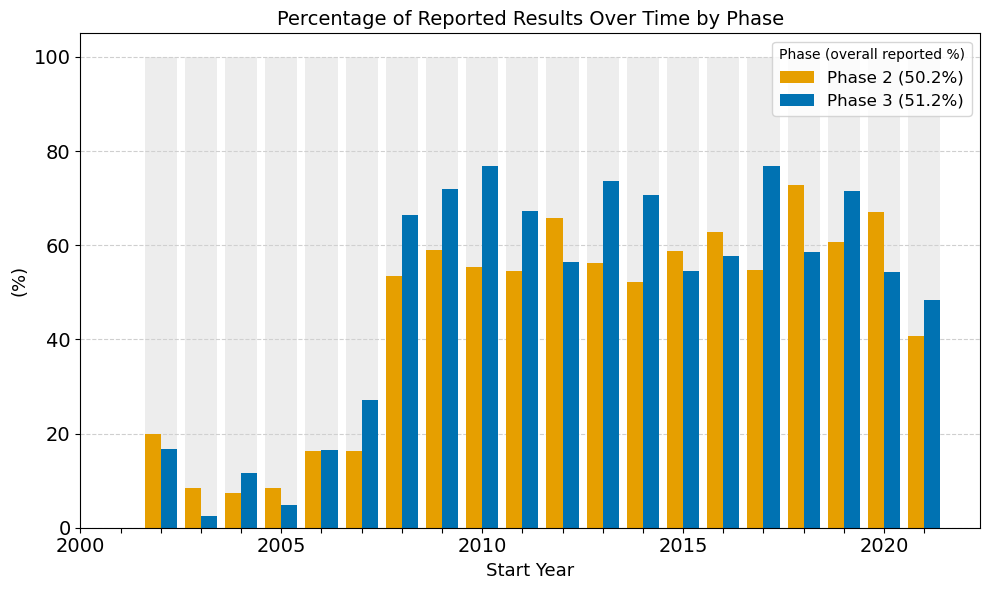

In [524]:
viz_reported_results_over_time(trial_results_reporting_metadata_p2_3,  "viz/phase_2_vs_3/results_reporting_by_phase_over_time.pdf")

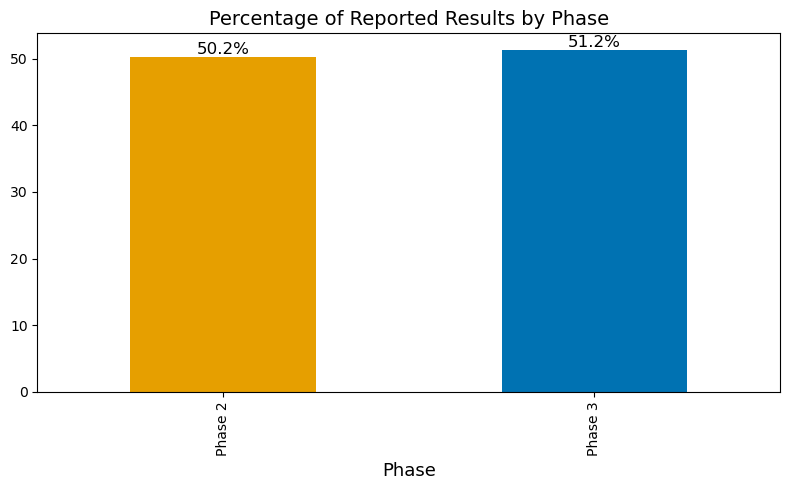

In [456]:
viz_reported_results_by_phase(trial_results_reporting_metadata_p2_3,  "viz/phase_2_vs_3/results_reporting_by_phase.pdf")

In [690]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

def viz_full_combined(trial_design, trial_sponsorship_metadata, trial_results_reporting, output_file):
    """
    Creates a single figure with five subplots (A, B, C, D, E):
    A: Agency Class by Phase (Grouped Horizontal Bar Chart)
    B: University vs. Industry Funding Over Time (Line Chart)
    C: Allocation by Phase (Grouped Horizontal Bar Chart)
    D: Masking by Phase (Grouped Horizontal Bar Chart)
    E: Percentage of Reported Results Over Time (Stacked Bar Chart)
    """

    # === CREATE FIGURE WITH FLEXIBLE GRID ===
    fig = plt.figure(figsize=(18, 14))  # Increase figure size for better spacing
    gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 0.6])  # Last row shorter for Plot E

    # === DEFINE SUBPLOTS ===
    ax_a = fig.add_subplot(gs[0, 0])  # Plot A
    ax_b = fig.add_subplot(gs[0, 1])  # Plot B
    ax_c = fig.add_subplot(gs[1, 0])  # Plot C
    ax_d = fig.add_subplot(gs[1, 1])  # Plot D
    ax_e = fig.add_subplot(gs[2, :])  # Plot E (full width below)

    # === PLOT A: AGENCY CLASS BY PHASE ===
    df = trial_sponsorship_metadata[['nct_id', 'agency_class', 'phase']].drop_duplicates()
    grouped = df.groupby(['agency_class', 'phase'], dropna=False)['nct_id'].nunique().reset_index()
    pivot_df = grouped.pivot(index='agency_class', columns='phase', values='nct_id').fillna(0)
    col_sums = pivot_df.sum(axis=0)
    pivot_df_perc = pivot_df.div(col_sums, axis='columns') * 100
    pivot_df_perc['Total'] = pivot_df_perc.sum(axis=1)
    pivot_df_perc = pivot_df_perc.sort_values(by='Total', ascending=True)
    pivot_df_perc.drop(columns='Total', inplace=True)

    phase_colors = {'Phase 2': '#E69F00', 'Phase 3': '#0072B2'}
    colors = [phase_colors[col] if col in phase_colors else 'gray' for col in pivot_df_perc.columns]

    pivot_df_perc.plot(kind='barh', ax=ax_a, color=colors, zorder=3)
    for container in ax_a.containers:
        ax_a.bar_label(container, label_type='edge', fmt='%.0f%%', fontsize=12)
           
    ax_a.set_title('Agency Class by Phase (as % of Each Phase)', fontsize=14)
    ax_a.set_xlabel('Percentage of Trials Within Each Phase', fontsize=13)
    ax_a.set_ylabel('', fontsize=13)
    ax_a.grid(axis='x', linestyle='--', alpha=0.6)
    ax_a.legend(title='', fontsize=12)
    ax_a.text(-0.03, 1.05, 'A', transform=ax_a.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
    ax_a.tick_params(axis='x', labelsize=12)
    ax_a.tick_params(axis='y', labelsize=12)
    
    # === PLOT B: UNIVERSITY VS. INDUSTRY FUNDING OVER TIME ===
    funding_df = trial_sponsorship_metadata[trial_sponsorship_metadata['agency_class'].isin(['UNIVERSITY', 'INDUSTRY'])].copy()
    funding_df = funding_df[['nct_id', 'start_year', 'agency_class', 'phase']].drop_duplicates()
    grouped_funding = funding_df.groupby(['start_year', 'phase', 'agency_class'], dropna=False)['nct_id'].nunique().reset_index()
    pivot_funding_df = grouped_funding.pivot(index='start_year', columns=['phase', 'agency_class'], values='nct_id').fillna(0)

    for agency in ['UNIVERSITY', 'INDUSTRY']:
        for phase in ['Phase 2', 'Phase 3']:
            if (phase, agency) in pivot_funding_df:
                ax_b.plot(
                    pivot_funding_df.index, pivot_funding_df[(phase, agency)],
                    linestyle='--' if agency == 'UNIVERSITY' else '-', label=f"{agency} - {phase}",
                    color=phase_colors[phase]
                )
    ax_b.set_title("University vs. Industry Funding Over Time", fontsize=14)
    ax_b.set_xlabel("Year", fontsize=13)
    ax_b.set_ylabel("Number of Trials", fontsize=13)
    ax_b.grid(axis='y', linestyle='--', alpha=0.6)
    ax_b.legend(title="", fontsize=12)
    ax_b.text(-0.03, 1.05, 'B', transform=ax_b.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
    ax_b.tick_params(axis='x', labelsize=12)
    ax_b.tick_params(axis='y', labelsize=12)
    
    # === PLOTS C & D: ALLOCATION & MASKING ===
    def create_plot(df, category_col, ax, title, label):
        grouped = df.groupby([category_col, 'phase'], dropna=False)['nct_id'].nunique().reset_index()
        pivot_df = grouped.pivot(index=category_col, columns='phase', values='nct_id').fillna(0)
        pivot_df_perc = pivot_df.div(pivot_df.sum(axis=0), axis='columns') * 100
        pivot_df_perc['Total'] = pivot_df_perc.sum(axis=1)
        pivot_df_perc = pivot_df_perc.sort_values(by='Total', ascending=True)
        pivot_df_perc.drop(columns='Total', inplace=True)

        pivot_df_perc.plot(kind='barh', ax=ax, color=colors, zorder=3)
        for container in ax.containers:
            ax.bar_label(container, label_type='edge', fmt='%.0f%%', fontsize=12)
        ax.set_xlim(0, 100)
        ax.set_title(title, fontsize=14)
        ax.set_xlabel('Percentage of Trials Within Each Phase', fontsize=13)
        ax.grid(axis='x', linestyle='--', alpha=0.6)
        ax.text(-0.03, 1.05, label, transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
        ax.tick_params(axis='x', labelsize=12)
        ax.tick_params(axis='y', labelsize=12)
        ax.set_ylabel('', fontsize=13)
        ax.legend(title='', loc='lower right', fontsize=12)

    create_plot(trial_design, 'allocation', ax_c, 'Allocation by Phase (as % of Each Phase)', 'C')
    create_plot(trial_design, 'masking', ax_d, 'Masking by Phase (as % of Each Phase)', 'D')

    # === PLOT E: PERCENTAGE OF REPORTED RESULTS OVER TIME ===
    df = trial_results_reporting[['nct_id', 'completion_year', 'were_results_reported', 'overall_status', 'phase']].drop_duplicates()

    # Filter trials where completion_year < 2022 and overall_status is 'Completed'
    df = df[(df['completion_year'] < 2022) & (df['overall_status'] == 'Completed')]
    df['completion_year'] = df['completion_year'].astype(int)
    
    total_counts = df.groupby(['completion_year', 'phase'])['nct_id'].count().unstack()
    reported_counts = df[df['were_results_reported'] == True].groupby(['completion_year', 'phase'])['nct_id'].count().unstack()
    reporting_percentage = (reported_counts / total_counts) * 100
    non_reporting_percentage = 100 - reporting_percentage.fillna(0)
    overall_reporting_percentage = (reported_counts.sum() / total_counts.sum()) * 100

    width = 0.4
    x = np.arange(len(reporting_percentage.index))
    #for i, phase in enumerate(reporting_percentage.columns):
     #   ax_e.bar(x + (i - 0.5) * width, reporting_percentage[phase], width=width, label=f"{phase} ({overall_reporting_percentage[phase]:.1f}%)", color=phase_colors.get(phase, 'gray'), zorder=2)
      #  ax_e.bar(x + (i - 0.5) * width, non_reporting_percentage[phase], width=width, bottom=reporting_percentage[phase], color='lightgray', alpha=0.4, zorder=1)

    for i, phase in enumerate(reporting_percentage.columns):
        # Plot reported results
        bars = ax_e.bar(
            x + (i - 0.5) * width, reporting_percentage[phase], width=width,
            label=f"{phase} ({overall_reporting_percentage[phase]:.1f}%)",
            color=phase_colors.get(phase, 'gray'), zorder=2
        )
        
        # Plot non-reported results
        ax_e.bar(
            x + (i - 0.5) * width, non_reporting_percentage[phase], width=width,
            bottom=reporting_percentage[phase], color='lightgray', alpha=0.4, zorder=1
        )
        
        # Add percentage labels on top of the bars
        for bar in bars:
            height = bar.get_height()
            ax_e.text(
                bar.get_x() + bar.get_width() / 2, height + 2,  # Adjust vertical position
                f"{height:.0f}%", ha='center', va='bottom', fontsize=11
            )
    ax_e.set_title('Percentage of Reported Results Over Time by Phase', fontsize=14)

    ax_e.set_xticks(x)
    ax_e.set_xticklabels(reporting_percentage.index, rotation=0, fontsize=12)
    ax_e.grid(axis='y', linestyle='--', alpha=0.6)
    ax_e.text(-0.03, 1.05, 'E', transform=ax_e.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
    ax_e.set_ylabel("(%)", fontsize=13)
    ax_e.legend(title='', loc='upper left', fontsize=12)
    ax_e.tick_params(axis='x', labelsize=12)
    ax_e.tick_params(axis='y', labelsize=12)
    
    # === FINAL ADJUSTMENTS ===
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust spacing between plots
    plt.savefig(output_file)
    plt.show()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


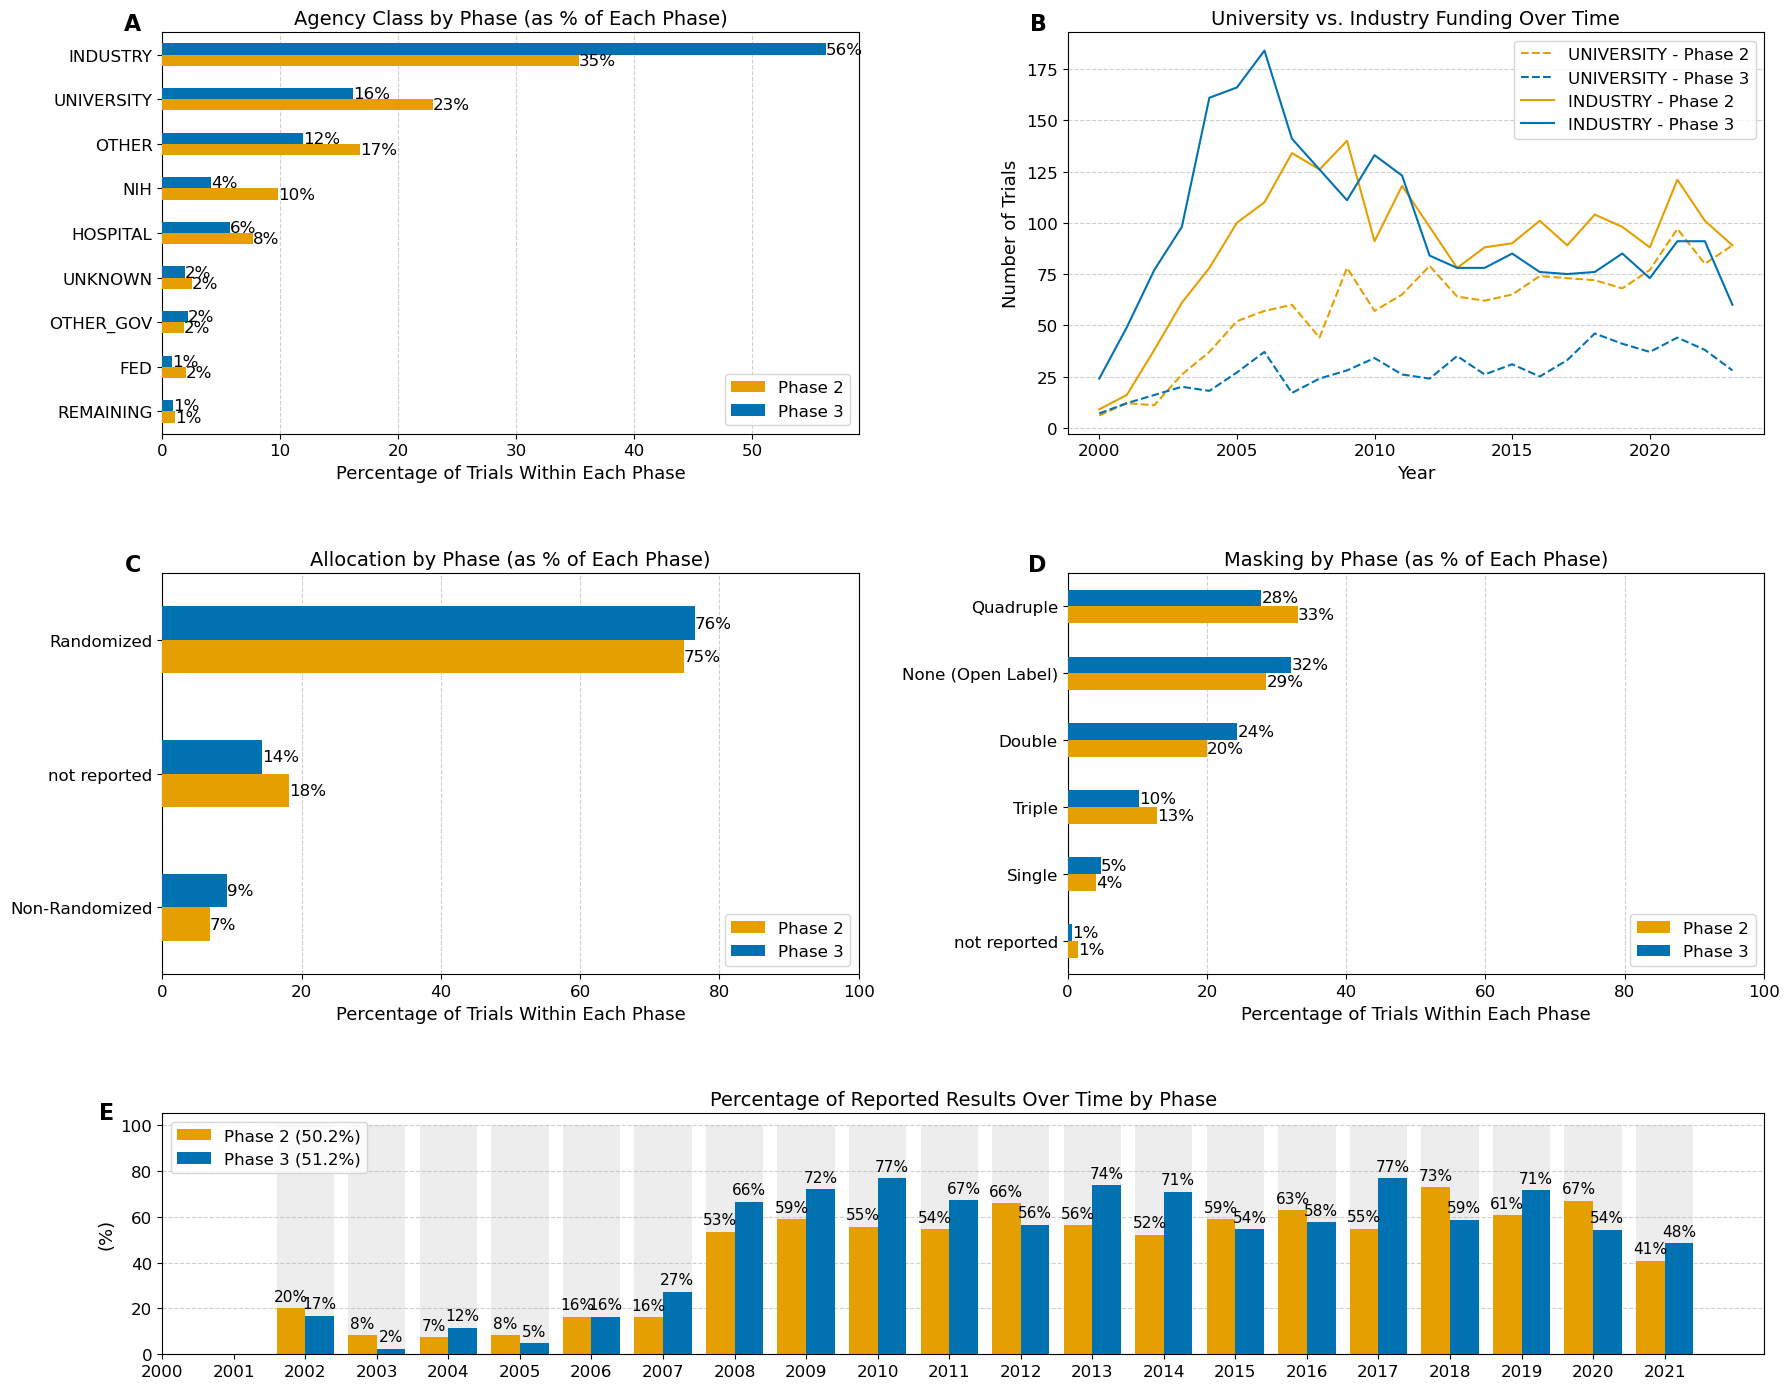

In [692]:
viz_full_combined(trial_design_metadata_p2_3, trial_sponsorship_metadata_p2_3, trial_results_reporting_metadata_p2_3, "viz/phase_2_vs_3/combined_phase_2_vs_3_visuals.pdf")

In [278]:
trial_sponsorship_metadata_p2_3

,nct_id,start_year,agency_class,lead_or_collaborator,sponsor_name,phase
0,NCT00000307,2003.0,NIH,lead,National Institute on Drug Abuse (NIDA),Phase 2
1,NCT00000307,2003.0,UNIVERSITY,collaborator,University of Texas,Phase 2
2,NCT00000333,2001.0,NIH,lead,National Institute on Drug Abuse (NIDA),Phase 2
3,NCT00000333,2001.0,HOSPITAL,collaborator,Washington D.C. Veterans Affairs Medical Center,Phase 2
4,NCT00000439,2000.0,NIH,lead,National Institute on Alcohol Abuse and Alcoho...,Phase 2
...,...,...,...,...,...,...
12358,NCT06153004,2023.0,OTHER,collaborator,Sangath,Phase 3
12359,NCT06189027,2018.0,UNIVERSITY,lead,University of Southern California,Phase 3
12360,NCT06189027,2018.0,OTHER,collaborator,Multidisciplinary Association for Psychedelic ...,Phase 3
12361,NCT06211478,2023.0,UNIVERSITY,lead,Ain Shams University,Phase 3
